In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Volume Data

In [60]:
df_vol = pd.read_csv("../data/inbound_volume_data.csv", index_col=0)

### 1. Initial reading

In [33]:
df_vol.head()

Timestamp    Provider    Plant Actual Vol [Kg] Expected Vol [Kg]
0   2015/07  Provider_1  Plant_1           19096             20298
1   2015/08  Provider_1  Plant_1          187139            189973
2   2015/09  Provider_1  Plant_1          181149            187798
3   2015/10  Provider_1  Plant_1          202677            202327
4   2015/11  Provider_1  Plant_1          272902            271765

In [34]:
df_vol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47058 entries, 0 to 60518
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          47058 non-null  object
 1   Provider           47058 non-null  object
 2   Plant              47058 non-null  object
 3   Actual Vol [Kg]    47055 non-null  object
 4   Expected Vol [Kg]  46951 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [35]:
df_vol.describe()

Timestamp    Provider     Plant Actual Vol [Kg] Expected Vol [Kg]
count      47058       47058     47058           47055             46951
unique       106          38        18           45291             46179
top      2018/08  Provider_3  Plant_19             160                 0
freq         493        1779      2922              17                57

### 2. Data type editing

#### 2.1 Time 

In [61]:
df_vol['Timestamp']=pd.to_datetime(df_vol['Timestamp'], format='%Y/%m')

#### 2.2 Numeric
 
We need to check first if the numeric values we have have non-numeric characters. This is important since we could have other special character in between the numbers which will provoke a ValueError when trying to parse it to string.

In [37]:
def non_numeric_characters(input_string: str) -> str:
    """
    Define a regular expression pattern
    to match any non-digit character
    """
    pattern = re.compile(r"\D")
    non_numeric_chars = pattern.findall(str(input_string))
    return str(non_numeric_chars)

array(['[]', "[',']", "['.']", "['.', '.']"], dtype=object)

In [64]:
# Find all non-numeric characters
df_vol["Actual Vol [Kg]"].dropna().apply(non_numeric_characters).unique()

array(['[]', "['.']", "['.', '.']"], dtype=object)

In [65]:
df_vol["Expected Vol [Kg]"].dropna().apply(non_numeric_characters).unique()

array(['[]', "[',']", "['.']", "['.', '.']"], dtype=object)

In [66]:
# We can verify by ourselves which datapoints contain
# (.) in the Column "Actual Vol [Kg]"
df_vol[
    df_vol["Actual Vol [Kg]"].apply(lambda x: True if "." in str(x) else False)
].head()

Timestamp    Provider    Plant Actual Vol [Kg] Expected Vol [Kg]
55308 2022-01-01  Provider_2  Plant_4         784.974           758.414
55309 2022-01-01  Provider_3  Plant_4       1.736.973         1.544.132
55310 2022-01-01  Provider_4  Plant_4         417.621         1.002.859
55311 2022-01-01  Provider_5  Plant_4       2.535.036         2.699.221
55312 2022-01-01  Provider_6  Plant_4          98.101            98.348

In [63]:
# We can verify by ourselves which datapoints contain
# (.) in the Column "Expected Vol [Kg]"
df_vol[
    df_vol["Expected Vol [Kg]"].apply(lambda x: True if "." in str(x) else False)
].head()

Timestamp     Provider    Plant Actual Vol [Kg] Expected Vol [Kg]
11925 2016-10-01  Provider_16  Plant_1            1937             2.026
11926 2016-11-01  Provider_16  Plant_1          159462           156.923
11927 2016-12-01  Provider_16  Plant_1          371940           371.941
11928 2017-01-01  Provider_16  Plant_1          409358           409.111
11929 2017-02-01  Provider_16  Plant_1          347810           341.743

On this analysis we noticed that on Actual Vol the only non numeric character is the . and we realized it was used to mark the division between thousands. so we will replace it by an empty string. On the other hand Th Expected vol has both . and , so we need first to replace the . by an empty string and the , by a . 

And in both cases set this data as type float. 

In [67]:

df_vol['Actual Vol [Kg]'] = df_vol['Actual Vol [Kg]'].str.replace('.', '')
df_vol['Actual Vol [Kg]']=pd.to_numeric(df_vol['Actual Vol [Kg]'],errors='coerce')
df_vol['Expected Vol [Kg]'] = df_vol['Expected Vol [Kg]'].str.replace('.', '')
df_vol['Expected Vol [Kg]'] = df_vol['Expected Vol [Kg]'].str.replace(',', '.')
df_vol['Expected Vol [Kg]']=pd.to_numeric(df_vol['Expected Vol [Kg]'],errors='coerce')

df_vol.head()

Timestamp    Provider    Plant  Actual Vol [Kg]  Expected Vol [Kg]
0 2015-07-01  Provider_1  Plant_1          19096.0            20298.0
1 2015-08-01  Provider_1  Plant_1         187139.0           189973.0
2 2015-09-01  Provider_1  Plant_1         181149.0           187798.0
3 2015-10-01  Provider_1  Plant_1         202677.0           202327.0
4 2015-11-01  Provider_1  Plant_1         272902.0           271765.0

We noticed that the numbers on Kg are two big to handle so it would be useful to convert them to tons. 

In [68]:
df_vol["Actual Vol [Tons]"] = np.round(df_vol["Actual Vol [Kg]"] / 1000, 3)
df_vol["Expected Vol [Tons]"] = np.round(df_vol["Expected Vol [Kg]"] / 1000, 3)

In [69]:
df_vol.head()

Timestamp    Provider    Plant  Actual Vol [Kg]  Expected Vol [Kg]  \
0 2015-07-01  Provider_1  Plant_1          19096.0            20298.0   
1 2015-08-01  Provider_1  Plant_1         187139.0           189973.0   
2 2015-09-01  Provider_1  Plant_1         181149.0           187798.0   
3 2015-10-01  Provider_1  Plant_1         202677.0           202327.0   
4 2015-11-01  Provider_1  Plant_1         272902.0           271765.0   

   Actual Vol [Tons]  Expected Vol [Tons]  
0             19.096               20.298  
1            187.139              189.973  
2            181.149              187.798  
3            202.677              202.327  
4            272.902              271.765

### 3. Secondary analysis

In [71]:
df_vol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47058 entries, 0 to 60518
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            47058 non-null  datetime64[ns]
 1   Provider             47058 non-null  object        
 2   Plant                47058 non-null  object        
 3   Actual Vol [Kg]      47055 non-null  float64       
 4   Expected Vol [Kg]    46951 non-null  float64       
 5   Actual Vol [Tons]    47055 non-null  float64       
 6   Expected Vol [Tons]  46951 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.9+ MB


In [70]:
df_vol.describe()


Timestamp  Actual Vol [Kg]  Expected Vol [Kg]  \
count                          47058     4.705500e+04       4.695100e+04   
mean   2018-05-12 19:43:06.510263552     4.446285e+05       8.292719e+05   
min              2014-01-01 00:00:00     1.000000e+00       0.000000e+00   
25%              2016-05-01 00:00:00     7.908550e+04       6.820250e+04   
50%              2018-06-01 00:00:00     2.480090e+05       2.206440e+05   
75%              2020-06-01 00:00:00     5.767820e+05       5.253174e+05   
max              2022-10-01 00:00:00     5.880148e+07       5.165009e+08   
std                              NaN     7.162504e+05       9.156459e+06   

       Actual Vol [Tons]  Expected Vol [Tons]  
count       47055.000000         46951.000000  
mean          444.628452           829.271898  
min             0.001000             0.000000  
25%            79.085500            68.202500  
50%           248.009000           220.644000  
75%           576.782000           525.317500  
max         58801.478000        516500.852000  
std           716.250404          9156.458726

In [72]:
df_vol.groupby(['Plant','Provider']).count()
   

Timestamp  Actual Vol [Kg]  Expected Vol [Kg]  \
Plant   Provider                                                     
Plant_1 Provider_1          48               48                 48   
        Provider_10         88               88                 88   
        Provider_14         87               87                 87   
        Provider_15         43               43                 43   
        Provider_16         38               38                 38   
...                        ...              ...                ...   
Plant_9 Provider_5          93               93                 93   
        Provider_6          93               93                 93   
        Provider_7          93               93                 93   
        Provider_8          93               93                 93   
        Provider_9          93               93                 93   

                     Actual Vol [Tons]  Expected Vol [Tons]  
Plant   Provider                                             
Plant_1 Provider_1                  48                   48  
        Provider_10                 88                   88  
        Provider_14                 87                   87  
        Provider_15                 43                   43  
        Provider_16                 38                   38  
...                                ...                  ...  
Plant_9 Provider_5                  93                   93  
        Provider_6                  93                   93  
        Provider_7                  93                   93  
        Provider_8                  93                   93  
        Provider_9                  93                   93  

[624 rows x 5 columns]

### 4. Create a Timeseries Key

In [73]:
# Create Timeseries Key
df_vol["ts_key"] = df_vol[["Provider", "Plant"]].apply(
    lambda x: x["Provider"] + "-" + x["Plant"], axis=1
)
df_vol.head()

Timestamp    Provider    Plant  Actual Vol [Kg]  Expected Vol [Kg]  \
0 2015-07-01  Provider_1  Plant_1          19096.0            20298.0   
1 2015-08-01  Provider_1  Plant_1         187139.0           189973.0   
2 2015-09-01  Provider_1  Plant_1         181149.0           187798.0   
3 2015-10-01  Provider_1  Plant_1         202677.0           202327.0   
4 2015-11-01  Provider_1  Plant_1         272902.0           271765.0   

   Actual Vol [Tons]  Expected Vol [Tons]              ts_key  
0             19.096               20.298  Provider_1-Plant_1  
1            187.139              189.973  Provider_1-Plant_1  
2            181.149              187.798  Provider_1-Plant_1  
3            202.677              202.327  Provider_1-Plant_1  
4            272.902              271.765  Provider_1-Plant_1

### Plot Timeseries 

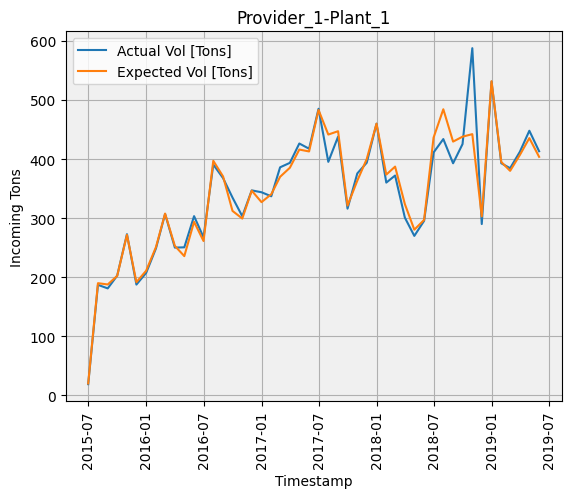

<Figure size 1200x500 with 0 Axes>

In [74]:
ts_key = "Provider_1-Plant_1"
x_axis = "Timestamp"
y1_axis = "Actual Vol [Tons]"
y2_axis = "Expected Vol [Tons]"
_df = df_vol.query(f" ts_key == '{ts_key}'")
x = _df[x_axis]
y1 = _df[y1_axis]
y2 = _df[y2_axis]

# Create a figure
fig, ax = plt.subplots()

# Create a line plot
plt.rc("text", usetex=False)
plt.figure(figsize=(12, 5))
ax.plot(x, y1, label=y1_axis)
ax.plot(x, y2, label=y2_axis)

# Add gridlines
ax.grid(True)

# Set a light gray background color
ax.set_facecolor("#f0f0f0")

# Add labels and a legend
ax.set_xlabel(x_axis)
ax.tick_params(axis="x", rotation=90)
ax.set_ylabel("Incoming Tons")
ax.set_title(ts_key)
ax.legend()

# # Show the plot
plt.show()

# Production Data

In [45]:
df_prod = pd.read_csv("../data/production_data.csv", index_col=0)

In [46]:
df_prod.head()

Timestamp  Plant_6  Plant_9  Plant_13  Plant_15  Plant_17  Plant_19  \
0   2014/01    11848    54138     33839     19438      6770     29098   
1   2014/02    13528    53063     36690     24252      6943     26975   
2   2014/03    12753    50551     38211     24978      7695     28991   
3   2014/04    12681    52528     36979     23872      7436     27409   
4   2014/05    13272    50855     31164     24145      7415     27959   

   Plant_21  Plant_11  Plant_4  Plant_12  Plant_20  Plant_14  Plant_22  \
0     45147      8578   326919     11668     93855     68067     13127   
1     42656      9739   334540     11275     92865     66012     18565   
2     46226     10619   356075     12306     99860     71251     19505   
3     47929     10379   351736     11790     95409     66233     23983   
4     47255     12155   332888     10407     97371     69890     21139   

   Plant_1  Plant_3  Plant_5  Plant_18  Plant_10  
0    26363    26363     5799     13749      3633  
1    29822    29822     7978     12880      2880  
2    28915    28915     8149     13348      4165  
3    29441    29441     5020     15650      4457  
4    28110    28110     7087     15940      4035

In [47]:
# Dataset Information
print("\nDataset Information:")
print(df_prod.info())
print(f"Number of rows: {len(df_prod)}")  # Number of rows
print(f"Number of columns: {len(df_prod.columns)}")  # Number of columns
print("\nData types per column:")
print(df_prod.dtypes)  # Data types of each column
print("\nMissing values per column:")
print(df_prod.isnull().sum())  # Number of missing values per column


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  120 non-null    object
 1   Plant_6    120 non-null    int64 
 2   Plant_9    120 non-null    int64 
 3   Plant_13   120 non-null    int64 
 4   Plant_15   120 non-null    int64 
 5   Plant_17   120 non-null    int64 
 6   Plant_19   120 non-null    int64 
 7   Plant_21   120 non-null    int64 
 8   Plant_11   120 non-null    int64 
 9   Plant_4    120 non-null    int64 
 10  Plant_12   120 non-null    int64 
 11  Plant_20   120 non-null    int64 
 12  Plant_14   120 non-null    int64 
 13  Plant_22   120 non-null    int64 
 14  Plant_1    120 non-null    int64 
 15  Plant_3    120 non-null    int64 
 16  Plant_5    120 non-null    int64 
 17  Plant_18   120 non-null    int64 
 18  Plant_10   120 non-null    int64 
dtypes: int64(18), object(1)
memory usage: 18.8+ KB
None
Nu

### 2. Data type editing

In [48]:
df_prod['Timestamp']=pd.to_datetime(df_prod['Timestamp'], format='%Y/%m')
df_prod.head()

Timestamp  Plant_6  Plant_9  Plant_13  Plant_15  Plant_17  Plant_19  \
0 2014-01-01    11848    54138     33839     19438      6770     29098   
1 2014-02-01    13528    53063     36690     24252      6943     26975   
2 2014-03-01    12753    50551     38211     24978      7695     28991   
3 2014-04-01    12681    52528     36979     23872      7436     27409   
4 2014-05-01    13272    50855     31164     24145      7415     27959   

   Plant_21  Plant_11  Plant_4  Plant_12  Plant_20  Plant_14  Plant_22  \
0     45147      8578   326919     11668     93855     68067     13127   
1     42656      9739   334540     11275     92865     66012     18565   
2     46226     10619   356075     12306     99860     71251     19505   
3     47929     10379   351736     11790     95409     66233     23983   
4     47255     12155   332888     10407     97371     69890     21139   

   Plant_1  Plant_3  Plant_5  Plant_18  Plant_10  
0    26363    26363     5799     13749      3633  
1    29822    29822     7978     12880      2880  
2    28915    28915     8149     13348      4165  
3    29441    29441     5020     15650      4457  
4    28110    28110     7087     15940      4035

In [49]:
melted_df_prod = df_prod.melt(id_vars=['Timestamp'], var_name='Plant', value_name='Production')
print(melted_df_prod)

      Timestamp     Plant  Production
0    2014-01-01   Plant_6       11848
1    2014-02-01   Plant_6       13528
2    2014-03-01   Plant_6       12753
3    2014-04-01   Plant_6       12681
4    2014-05-01   Plant_6       13272
...         ...       ...         ...
2155 2023-08-01  Plant_10        2061
2156 2023-09-01  Plant_10        6111
2157 2023-10-01  Plant_10        5778
2158 2023-11-01  Plant_10        6332
2159 2023-12-01  Plant_10        4757

[2160 rows x 3 columns]


# Analysis between datasets

In [50]:
# Grouping and summing 'Actual Volume [Kg]' by 'timeset' and 'plant'
produce_vs_received = df_vol.groupby(['Timestamp', 'Plant']).agg({
    'Actual Vol [Kg]': 'sum',
    'Expected Vol [Kg]': 'sum'
}).reset_index()

# Merge the production data from df_prod into summed_actual_volume based on both 'Timestamp' and 'plant'
produce_vs_received = pd.merge(produce_vs_received, melted_df_prod, on=['Timestamp','Plant'], how='left')

# Add a new column 'Difference' to calculate the difference between 'Expected Vol [Kg]' and 'Actual Vol [Kg]'
produce_vs_received['Difference'] = produce_vs_received['Expected Vol [Kg]'] - produce_vs_received['Actual Vol [Kg]']


#Ratio ['Actual Vol kg']/['Production'] having in mind that production can take a 0 value
produce_vs_received['Ratio'] = np.where(
    produce_vs_received['Production'] != 0, 
    produce_vs_received['Actual Vol [Kg]'] / produce_vs_received['Production'], 
    np.nan
)


print(produce_vs_received)


# Calculate the correlation between 'Actual Vol kg' and 'Production'
correlation = produce_vs_received['Actual Vol [Kg]'].corr(produce_vs_received['Production'])

print(f"Correlation coefficient between 'Actual Vol kg' and 'Production': {correlation}")

      Timestamp     Plant  Actual Vol [Kg]  Expected Vol [Kg]  Production  \
0    2014-01-01  Plant_10        4166476.0          4107710.0        3633   
1    2014-01-01  Plant_11        2768938.0          2610310.0        8578   
2    2014-01-01  Plant_12        3885615.0          2598812.0       11668   
3    2014-01-01  Plant_13       19005764.0         18513040.0       33839   
4    2014-01-01  Plant_14        4346333.0          4335248.0       68067   
...         ...       ...              ...                ...         ...   
1800 2022-10-01  Plant_20       12966890.0          4992758.0       34582   
1801 2022-10-01  Plant_22         144592.0           144947.0       89225   
1802 2022-10-01   Plant_4       18606479.0         17115672.0      280588   
1803 2022-10-01   Plant_5        5456730.0          3846482.0       15303   
1804 2022-10-01   Plant_6          26818.0            24356.0       15411   

      Difference        Ratio  
0       -58766.0  1146.841729  
1      -158

In [51]:
print(produce_vs_received.info())
print(produce_vs_received.describe())
print(produce_vs_received['Ratio'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1805 non-null   datetime64[ns]
 1   Plant              1805 non-null   object        
 2   Actual Vol [Kg]    1805 non-null   float64       
 3   Expected Vol [Kg]  1805 non-null   float64       
 4   Production         1805 non-null   int64         
 5   Difference         1805 non-null   float64       
 6   Ratio              1787 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 98.8+ KB
None
                           Timestamp  Actual Vol [Kg]  Expected Vol [Kg]  \
count                           1805     1.805000e+03       1.805000e+03   
mean   2018-05-03 15:46:10.304709120     1.159113e+07       2.157072e+07   
min              2014-01-01 00:00:00     2.250000e+02       3.700000e+01   
25%     

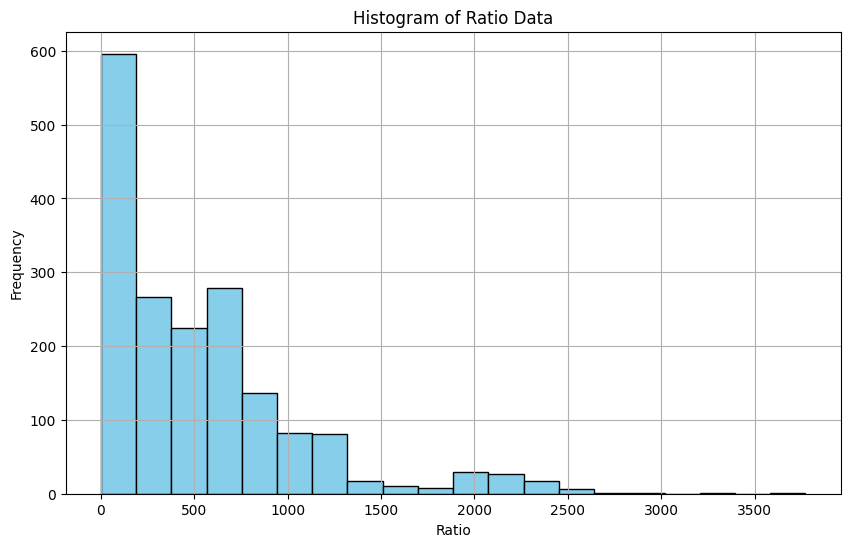

In [52]:
# Filtering out NaN values before plotting the histogram
ratio_data = produce_vs_received['Ratio'].dropna()

# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(ratio_data, bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Ratio Data')
plt.xlabel('Ratio')
plt.ylabel('Frequency')

# Display the histogram
plt.grid(True)
plt.show()


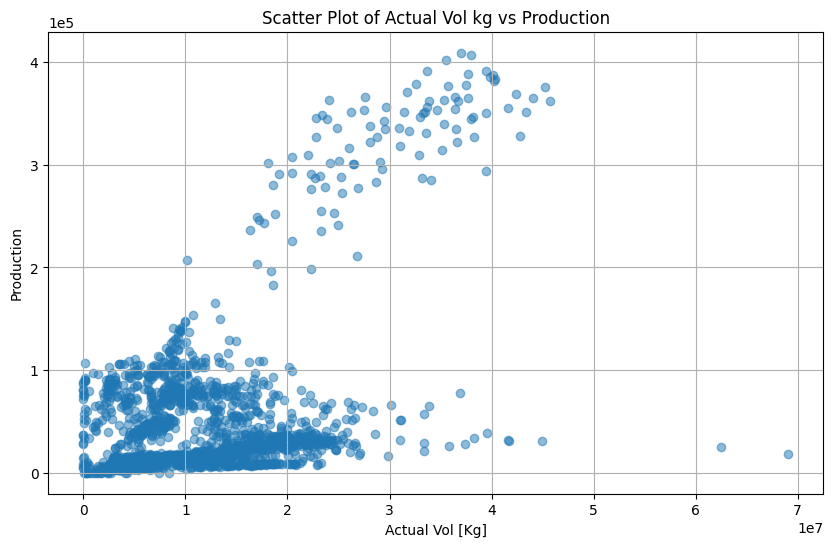

In [53]:
# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(produce_vs_received['Actual Vol [Kg]'], produce_vs_received['Production'], alpha=0.5)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Scatter Plot of Actual Vol kg vs Production')
plt.xlabel('Actual Vol [Kg]')
plt.ylabel('Production')
plt.grid(True)
plt.show()


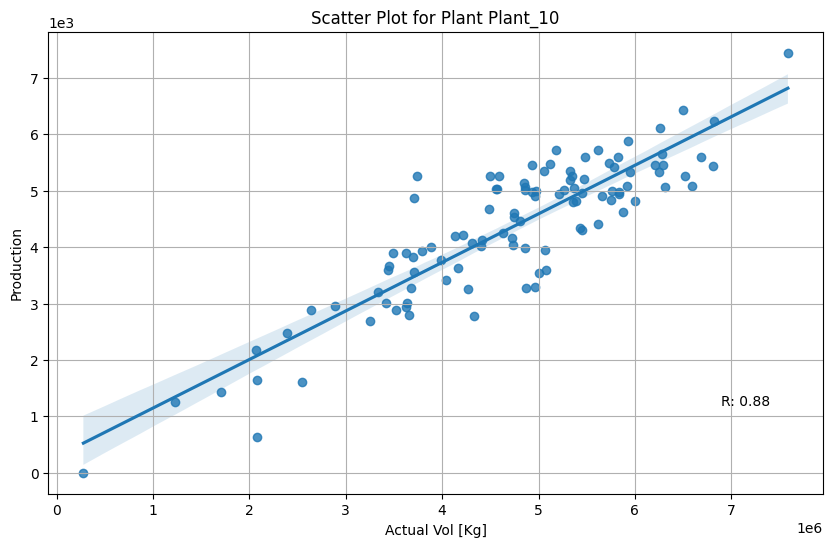

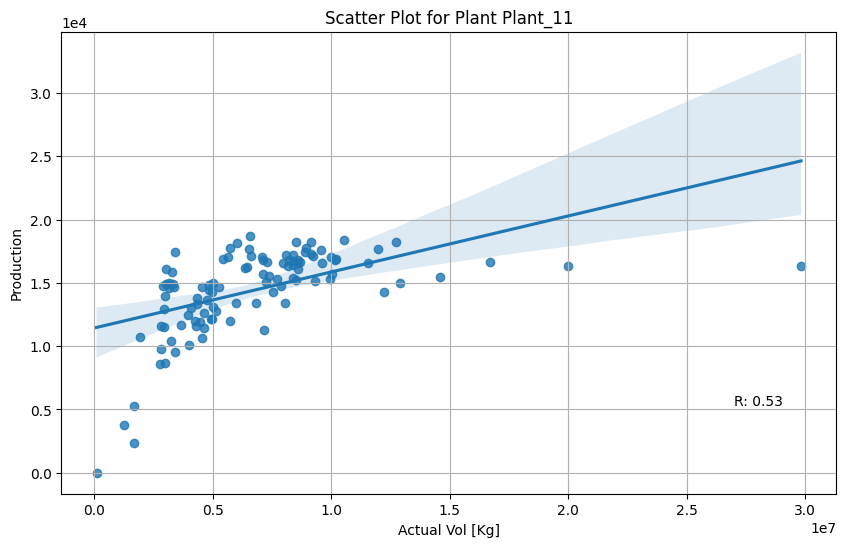

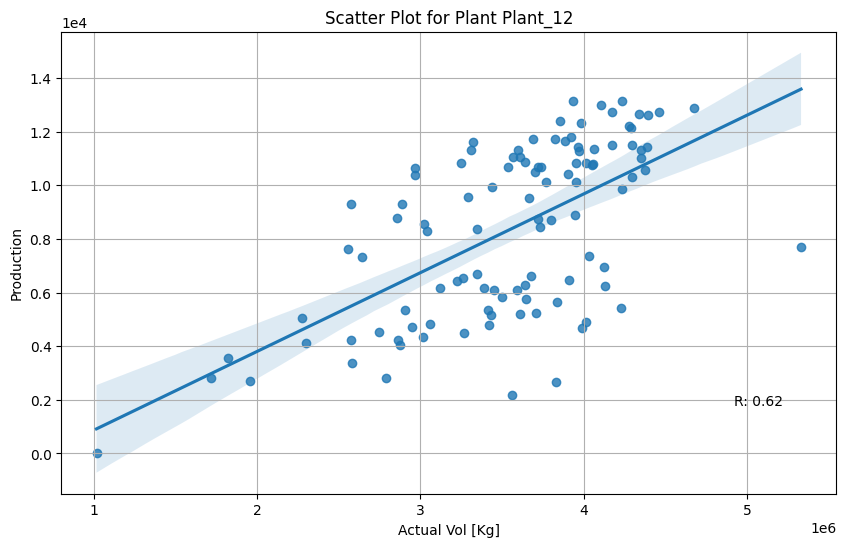

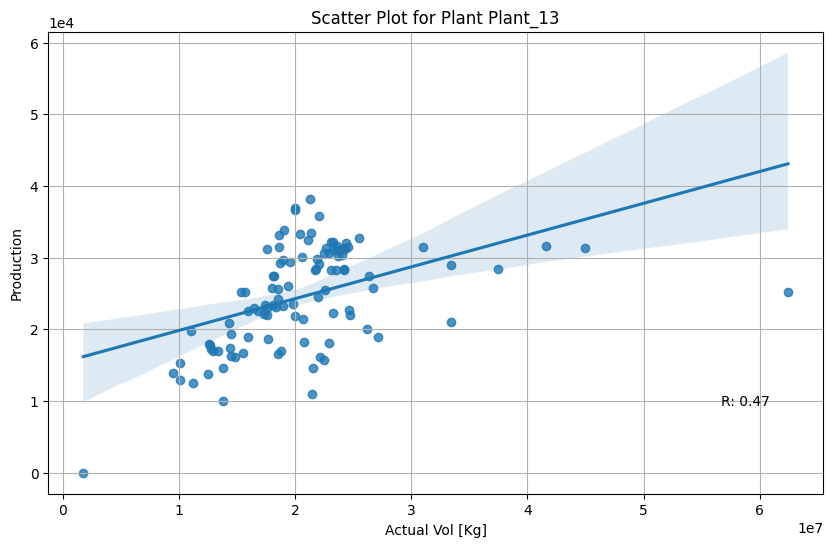

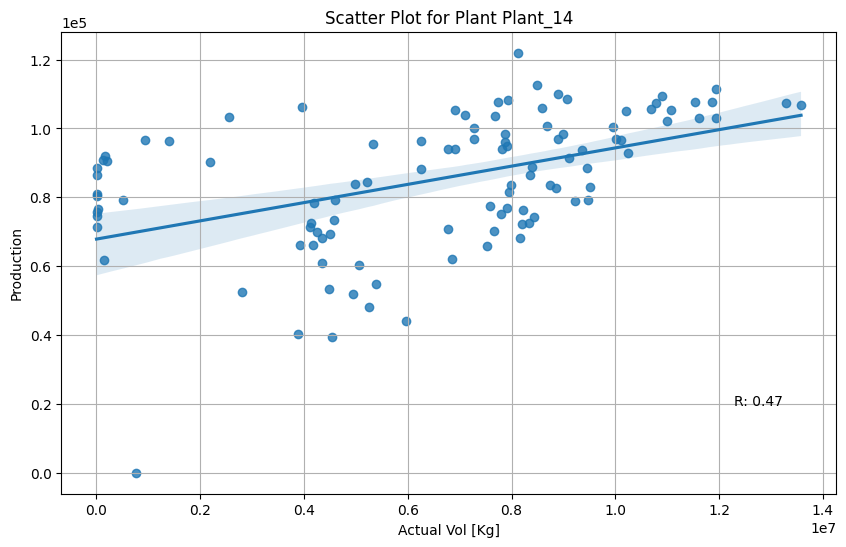

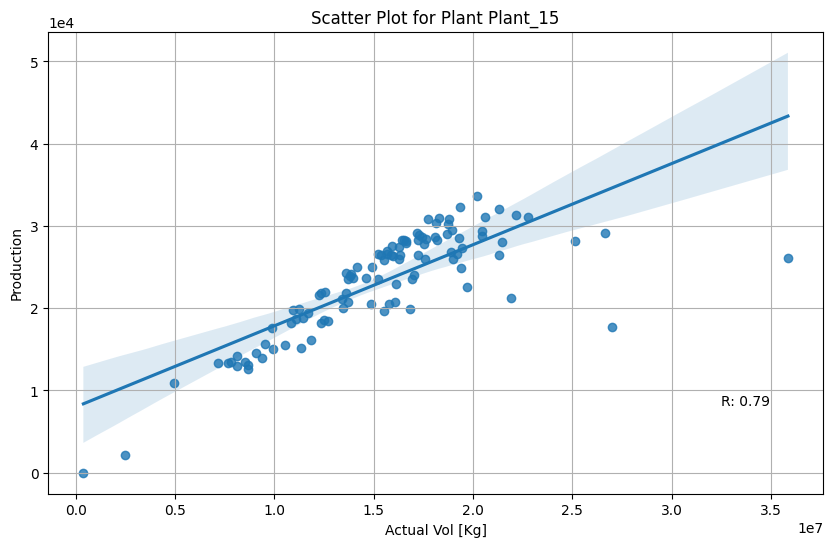

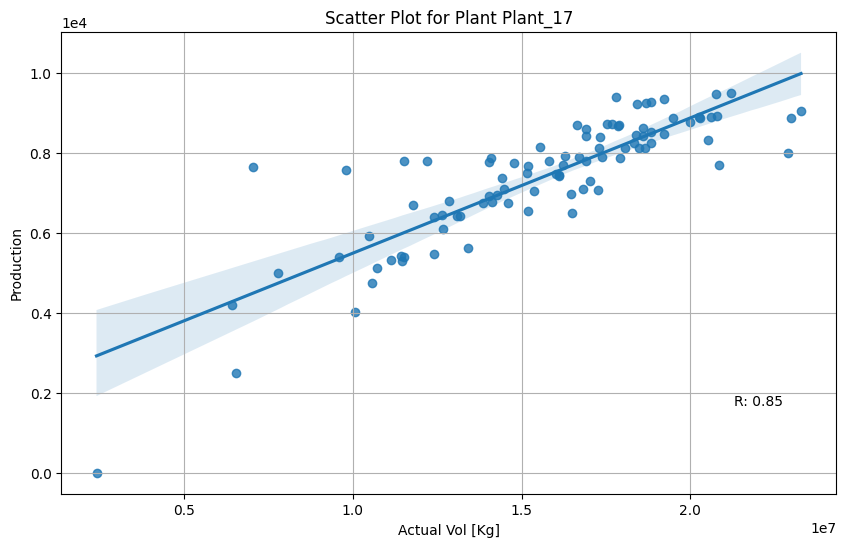

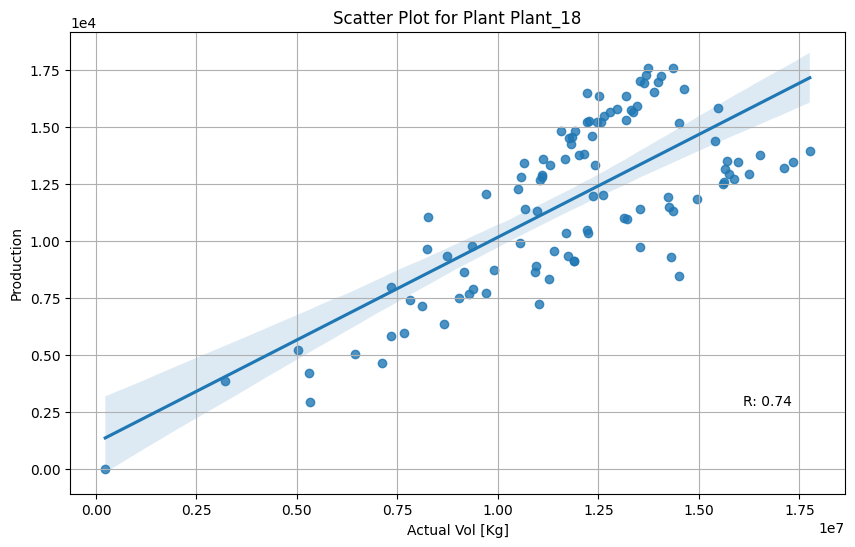

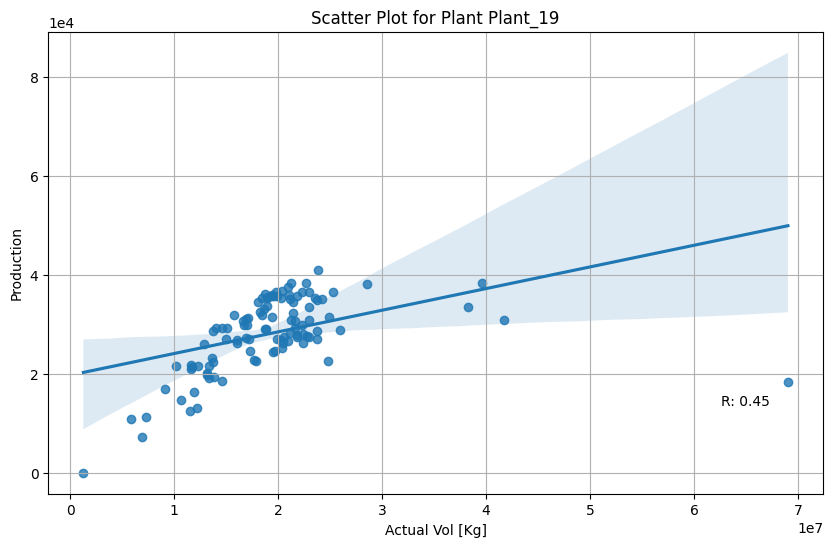

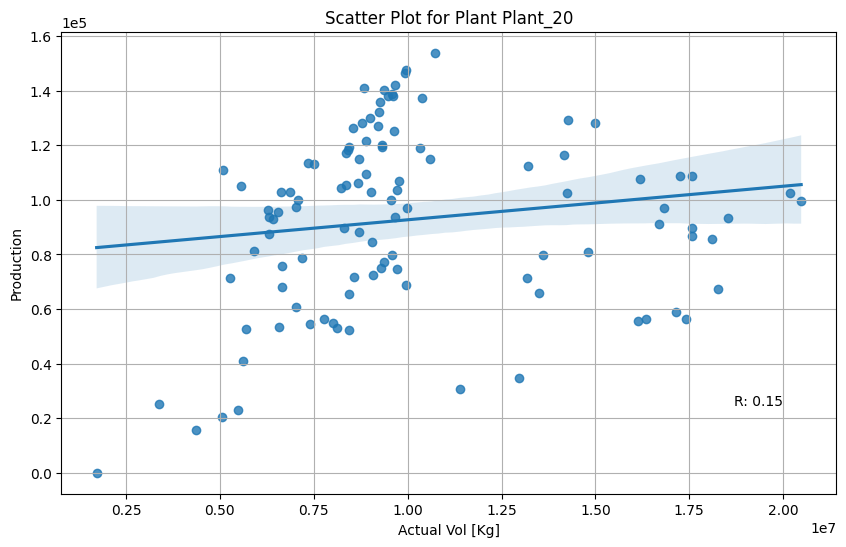

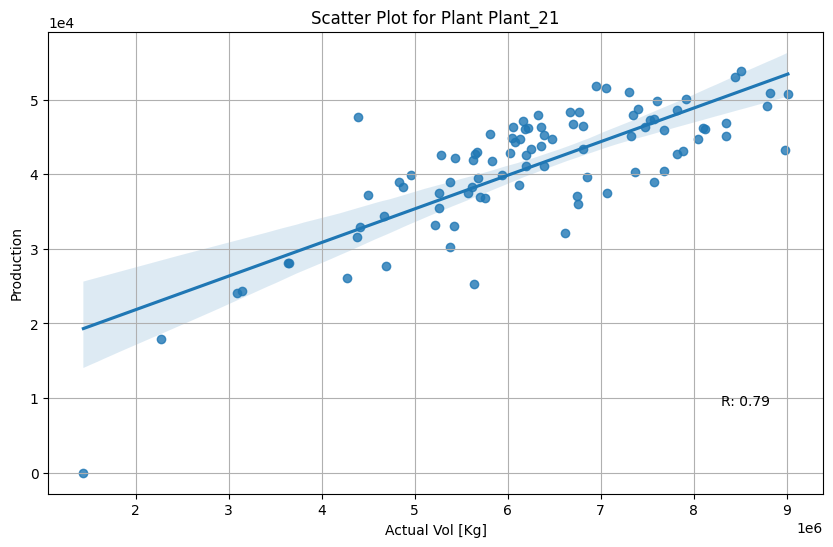

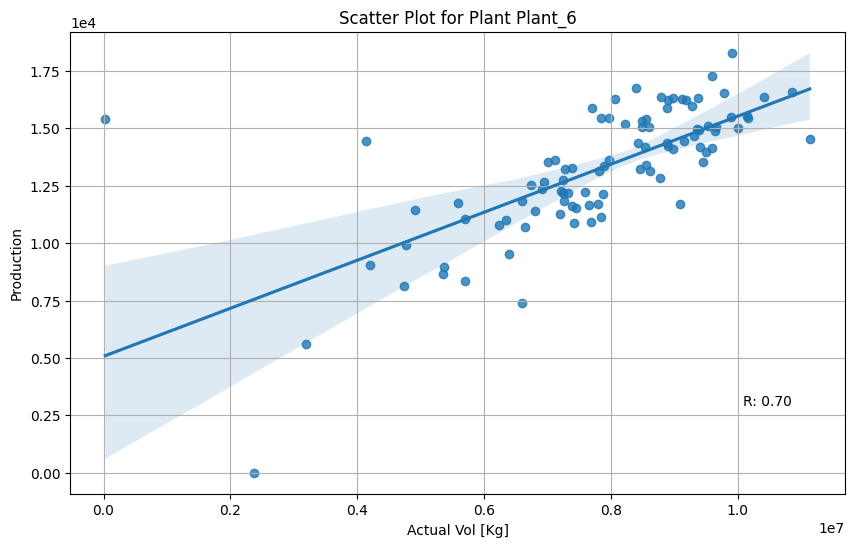

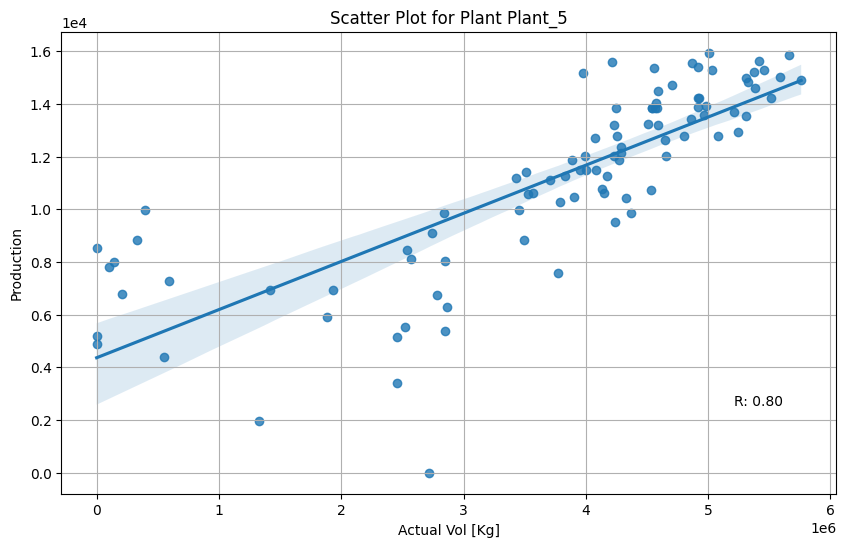

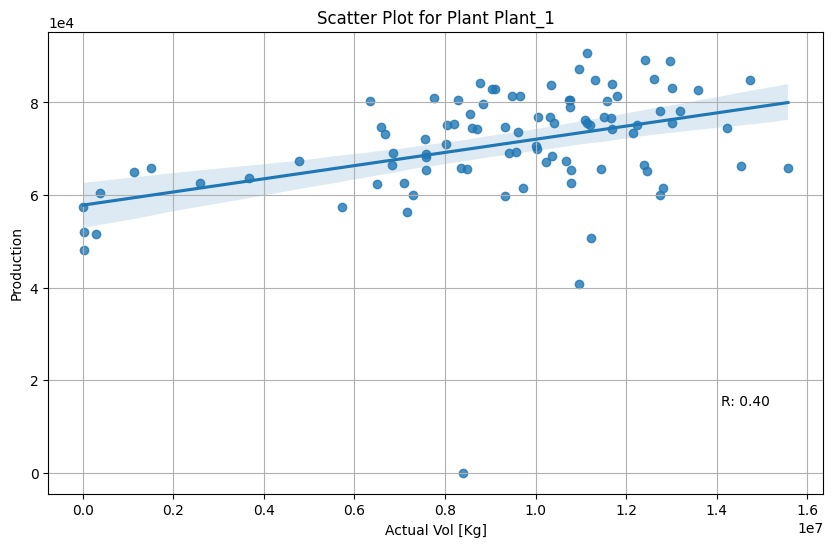

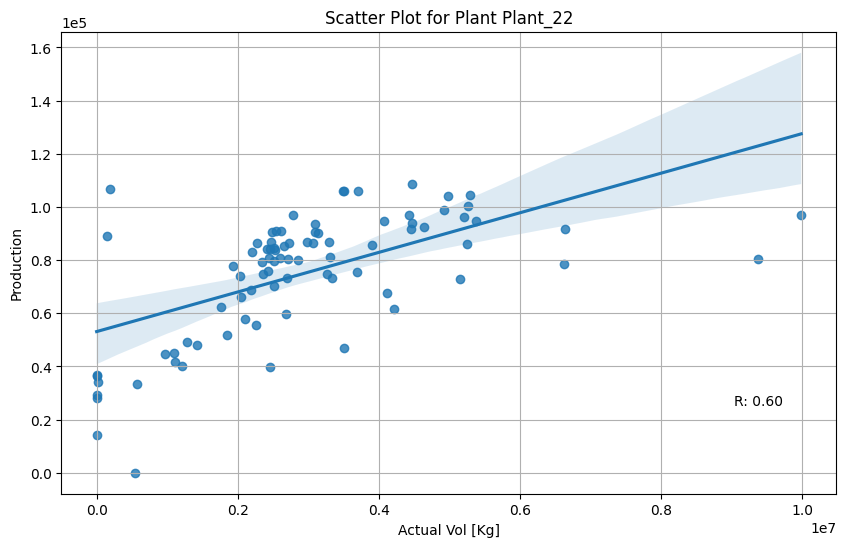

In [54]:
# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    # Filter data for the current plant
    plant_data = produce_vs_received[produce_vs_received['Plant'] == plant]
    
    # Create a plot for the current plant
    
    plt.figure(figsize=(10, 6))
    # Scatter plot with Seaborn's regression line
    sns.regplot(x='Actual Vol [Kg]', y='Production', data=plant_data)
    
    # Calculate and display the correlation coefficient
    correlation_coefficient = plant_data['Actual Vol [Kg]'].corr(plant_data['Production'])
    plt.text(0.9, 0.2, f'R: {correlation_coefficient:.2f}', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.title(f'Scatter Plot for Plant {plant}')
    plt.xlabel('Actual Vol [Kg]')
    plt.ylabel('Production')
    plt.grid(True)
    plt.show()  # Display the plot for the current plant



### Time

In [55]:
## PLOT: Actual Volume vs Expected Volume over Time
plt.figure(figsize=(10, 6))
plt.scatter(produce_vs_received['Timestamp'], produce_vs_received['Actual Vol [Kg]'], label='Actual Volume', color='blue', alpha=0.7)
plt.scatter(produce_vs_received['Timestamp'], produce_vs_received['Expected Vol [Kg]'], label='Expected Volume', color='red', alpha=0.7)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume [Kg]')
plt.title('Actual Volume vs Expected Volume over Time')

# Limit the y-axis to 1.0x10^7 (10,000,000)
plt.ylim(0.5, 1.0e8)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

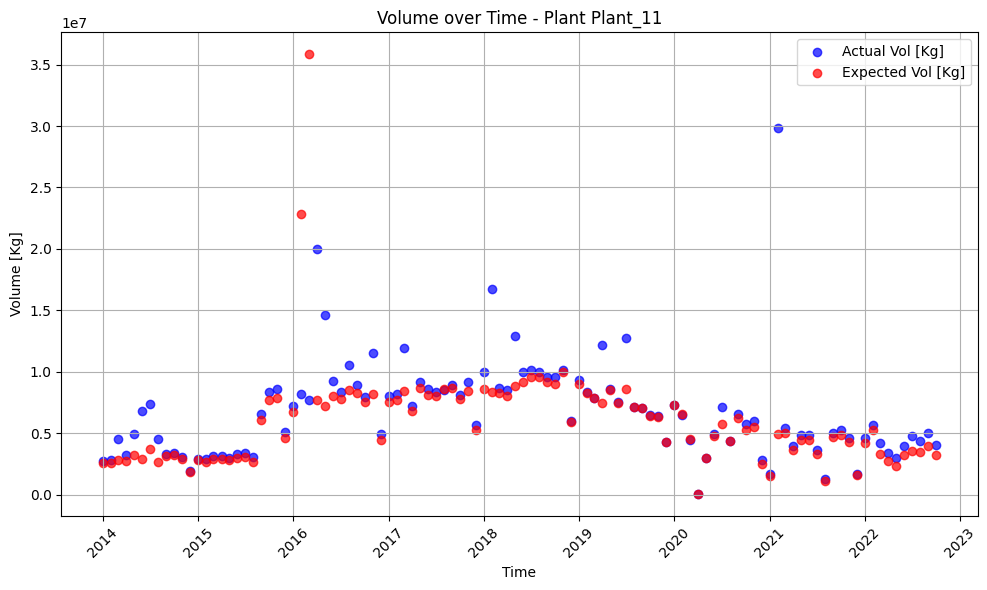

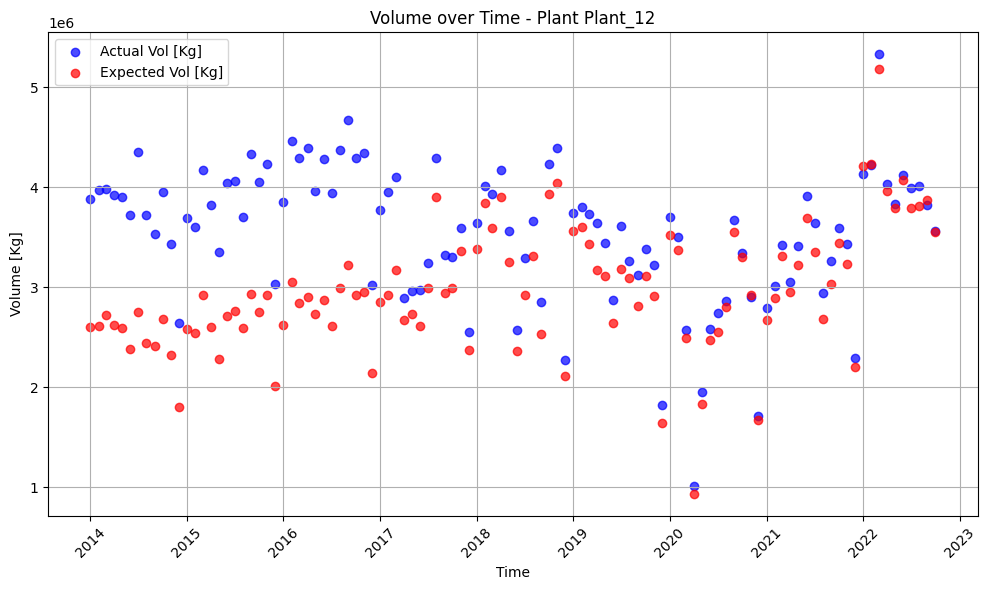

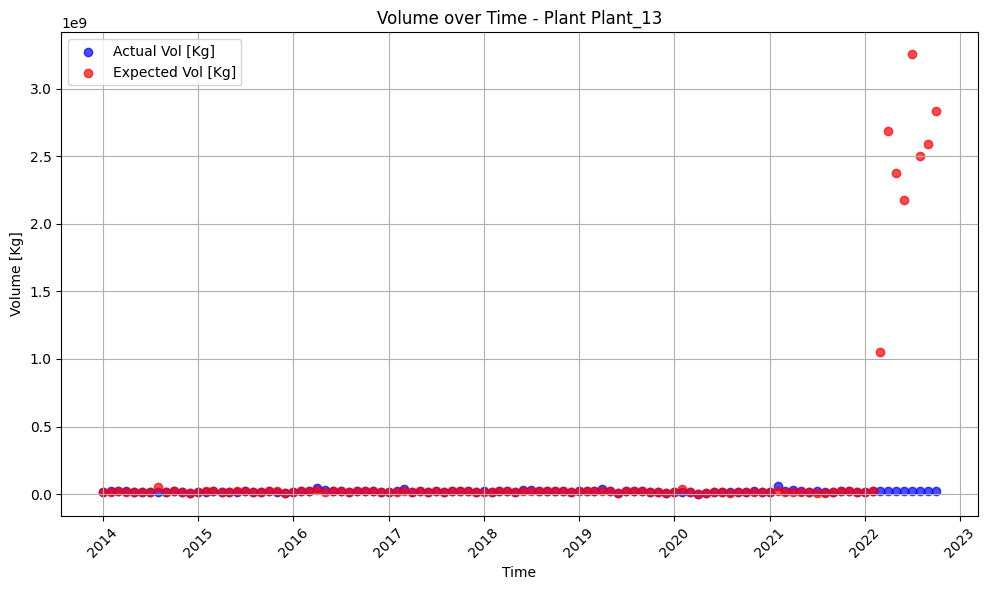

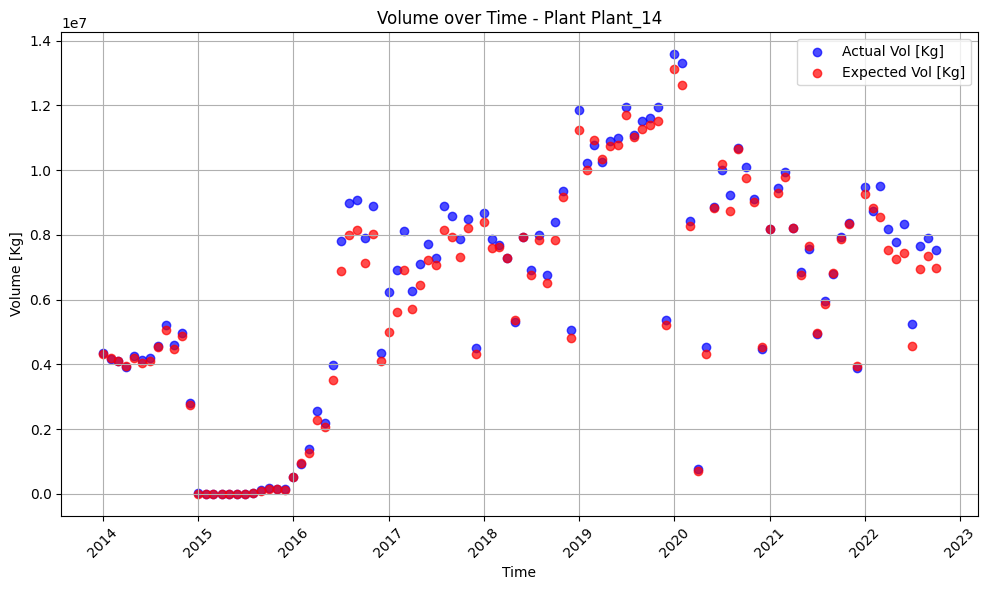

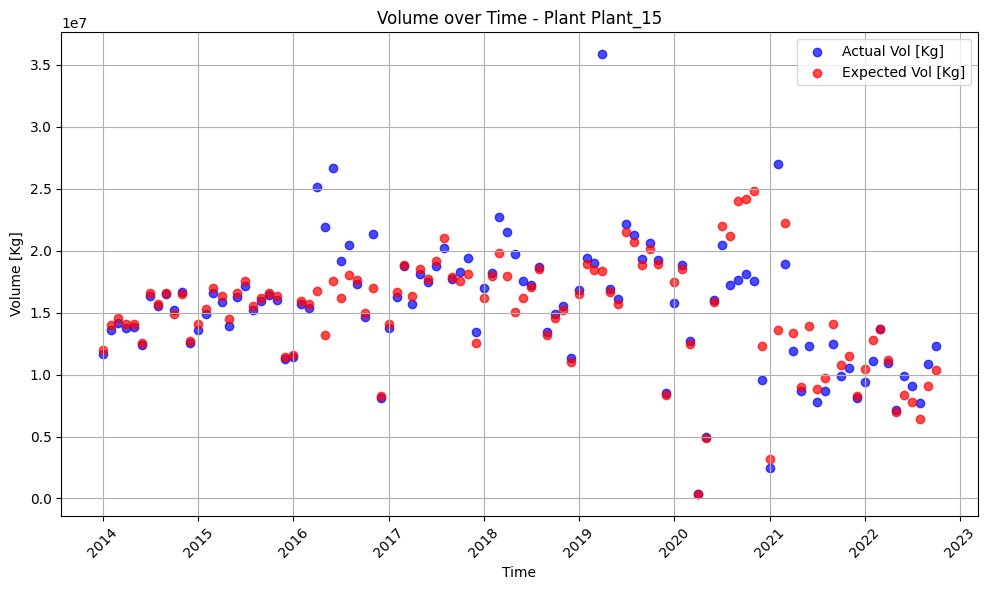

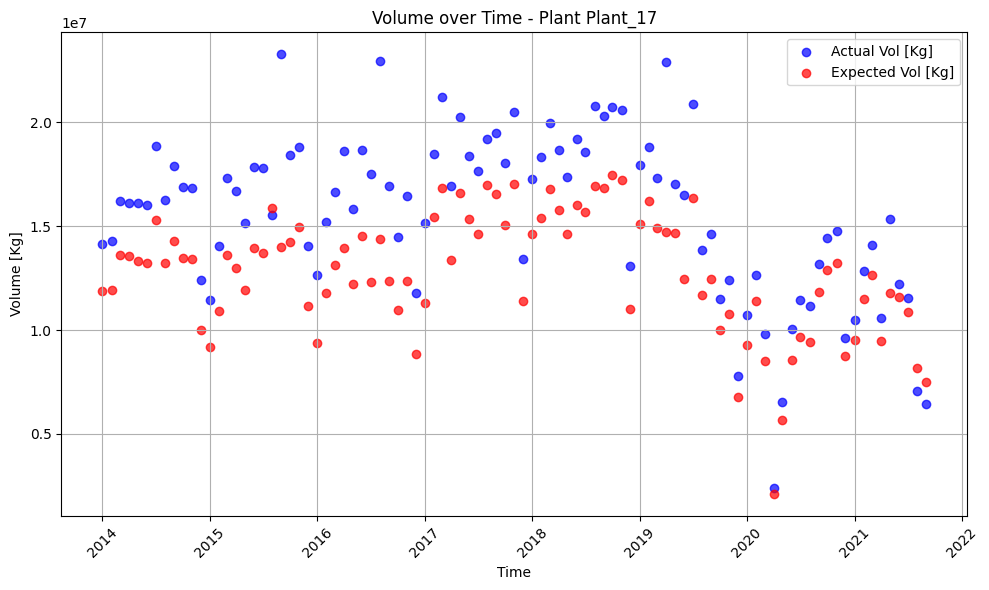

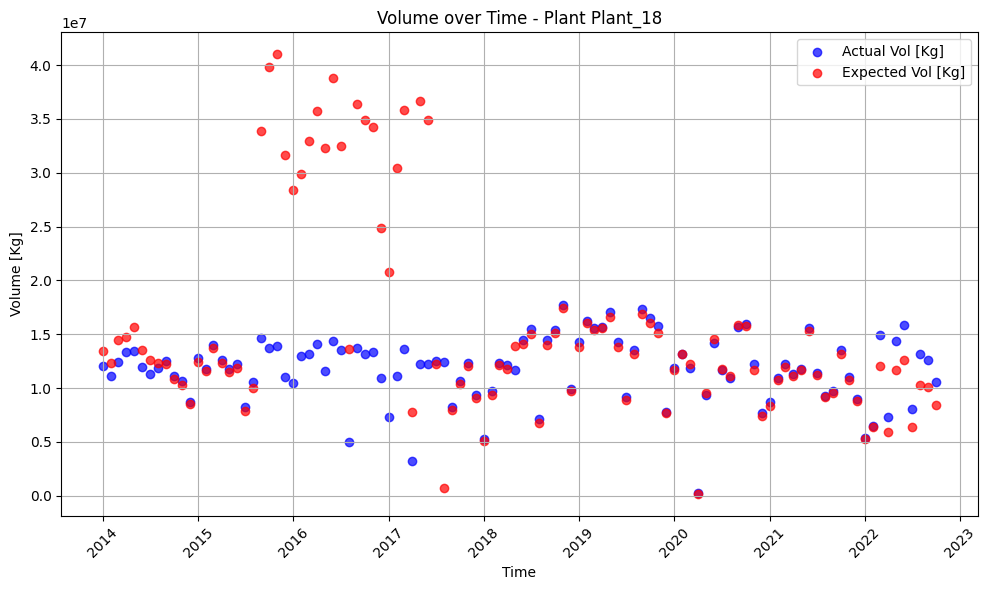

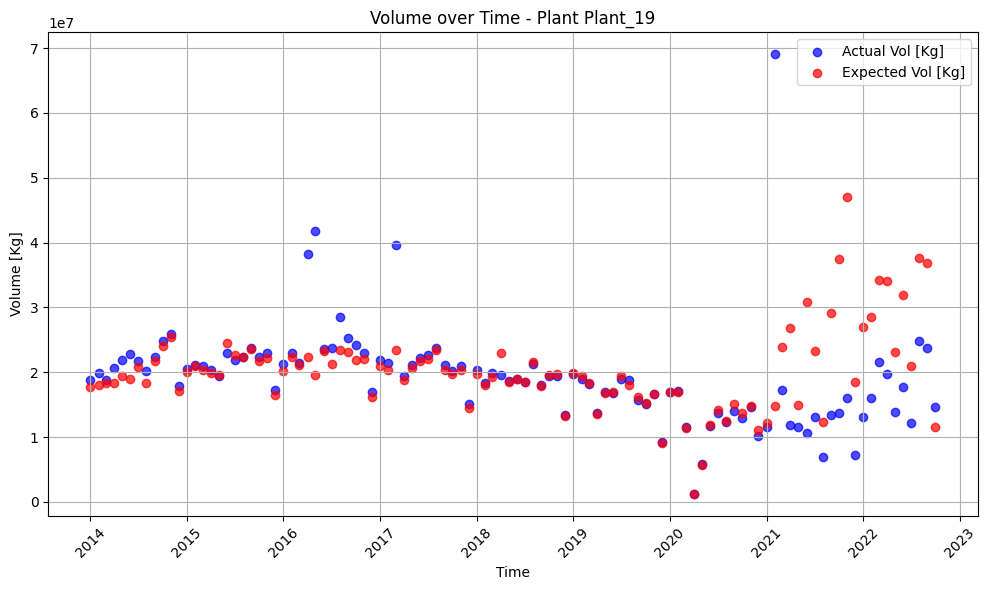

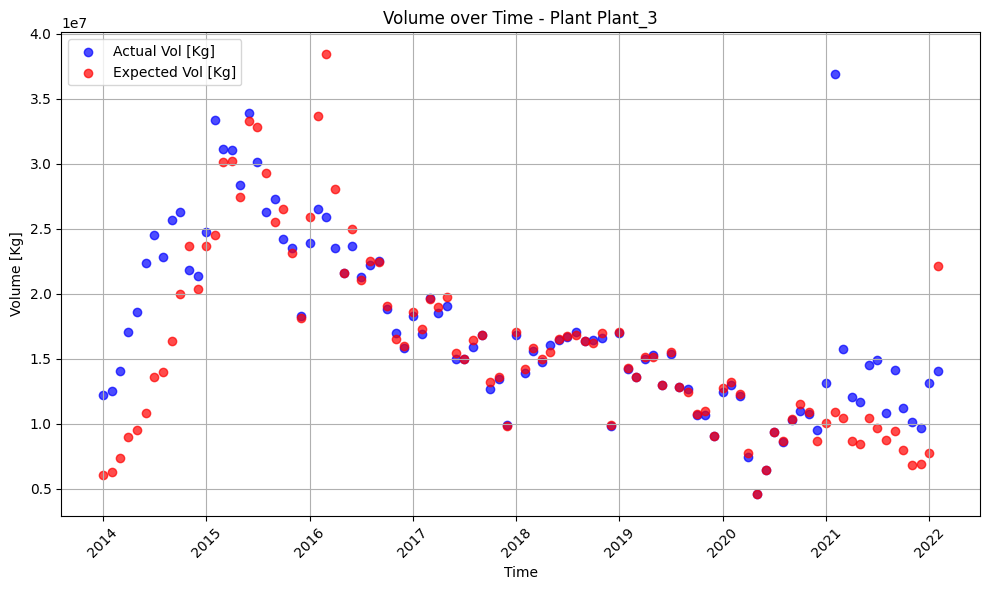

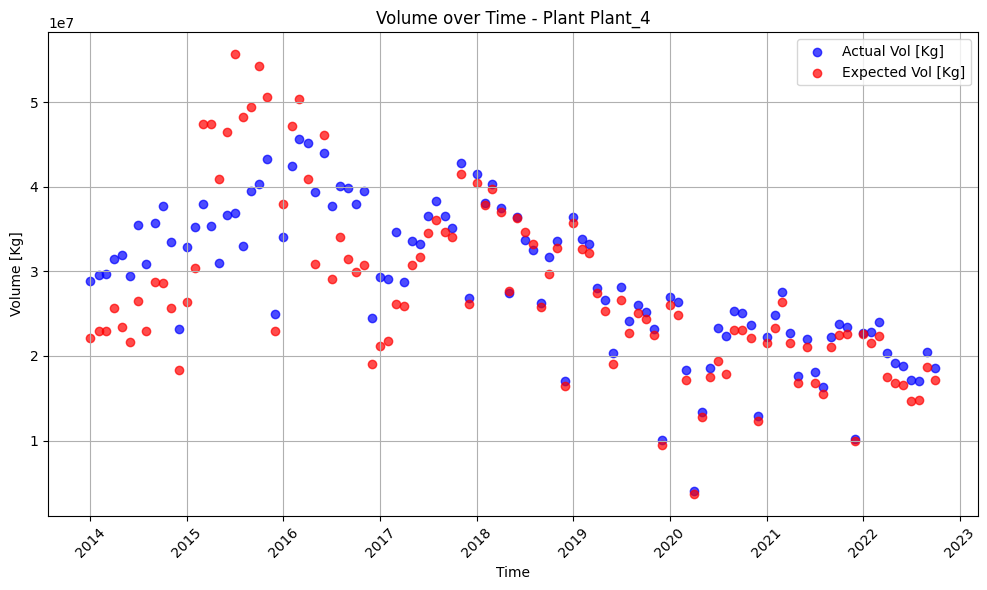

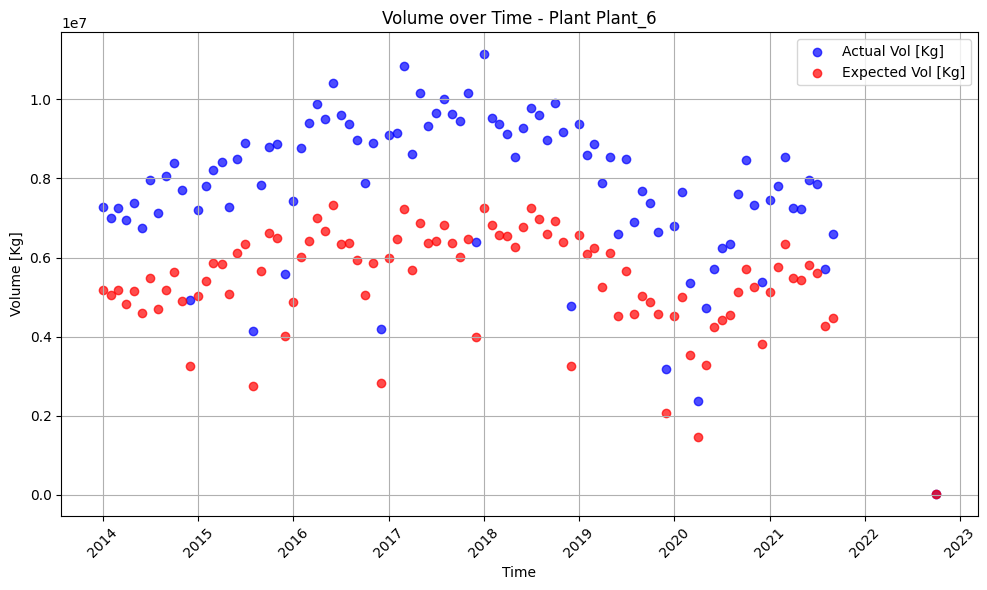

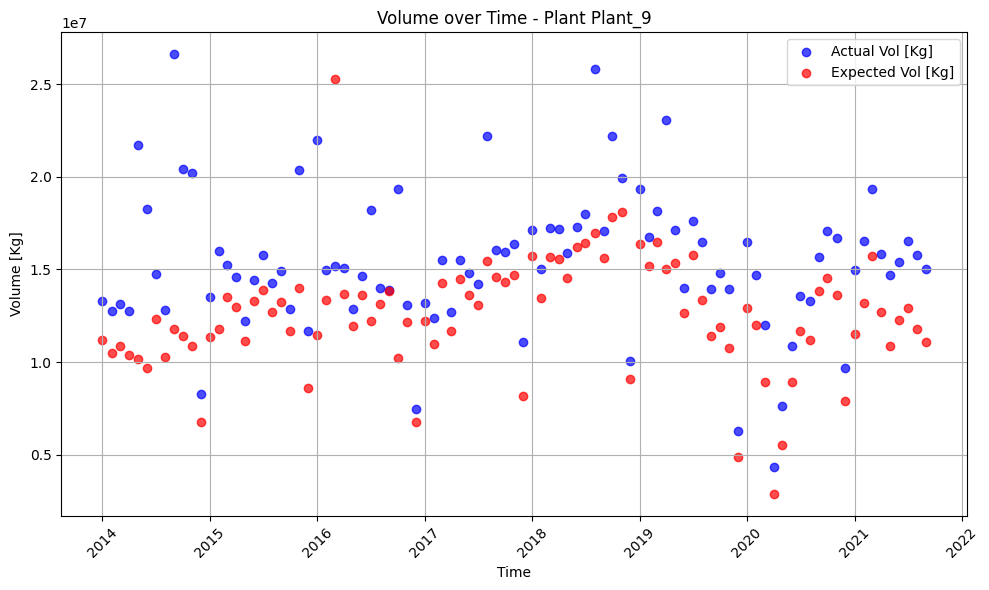

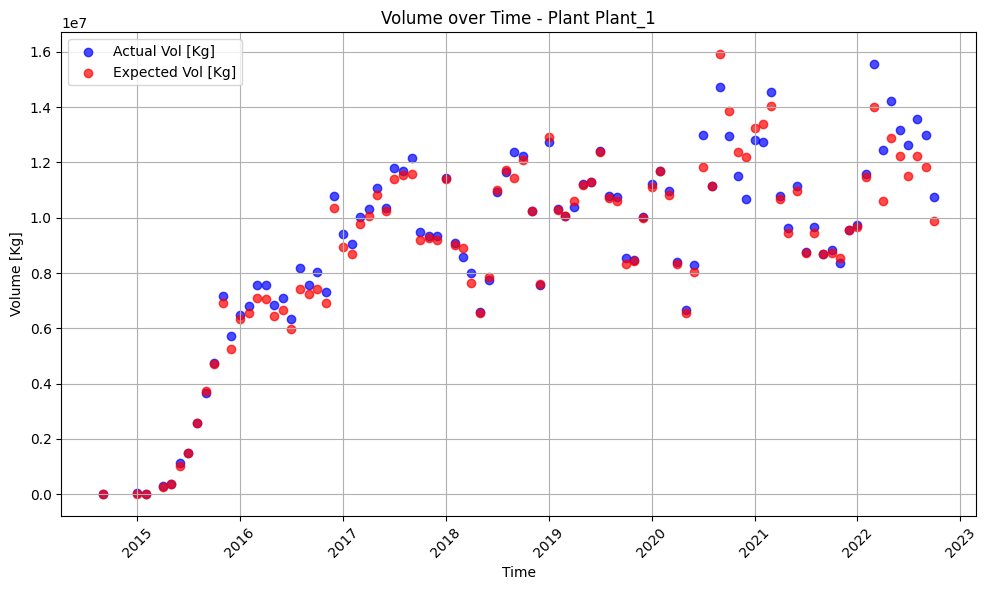

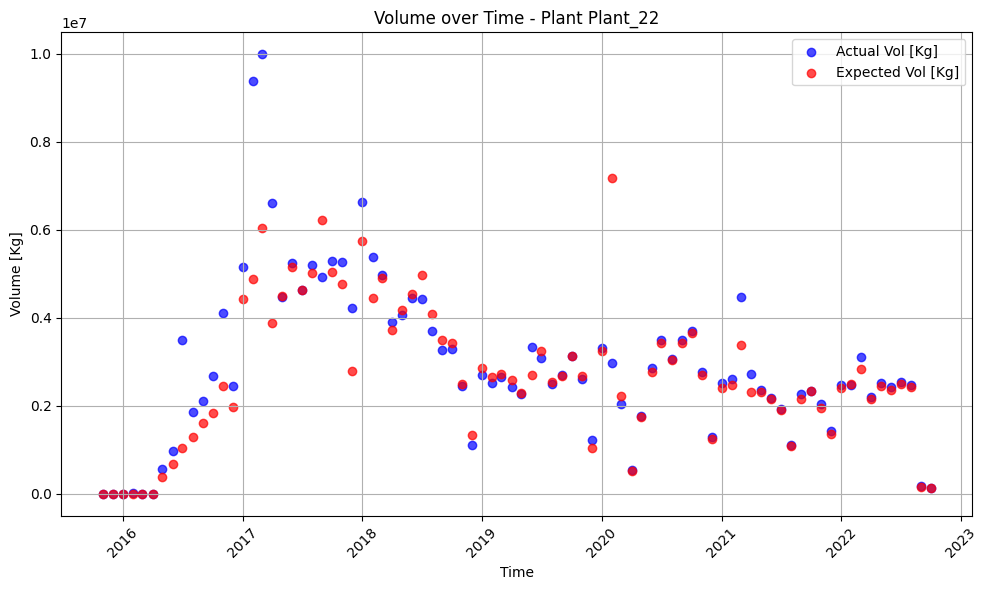

In [56]:
## PLOT: Actual Volume vs Expected Volume over Time (Per PLANT and in a set SETTIMEFRAME)

# Filter data for a specific timeframe (e.g., from 'start_date' to 'end_date')
start_date = '2014-01-01'
end_date = '2022-10-31'

# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    
    filtered_df = produce_vs_received[(produce_vs_received['Timestamp'] >= start_date) & (produce_vs_received['Timestamp'] <= end_date) &(produce_vs_received['Plant'] == plant)]

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['Timestamp'], filtered_df['Actual Vol [Kg]'], label='Actual Vol [Kg]', color='blue', alpha=0.7)
    plt.scatter(filtered_df['Timestamp'], filtered_df['Expected Vol [Kg]'], label='Expected Vol [Kg]', color='red', alpha=0.7)

    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Volume [Kg]')
    plt.title(f'Volume over Time - Plant {plant}')

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    # Show legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()


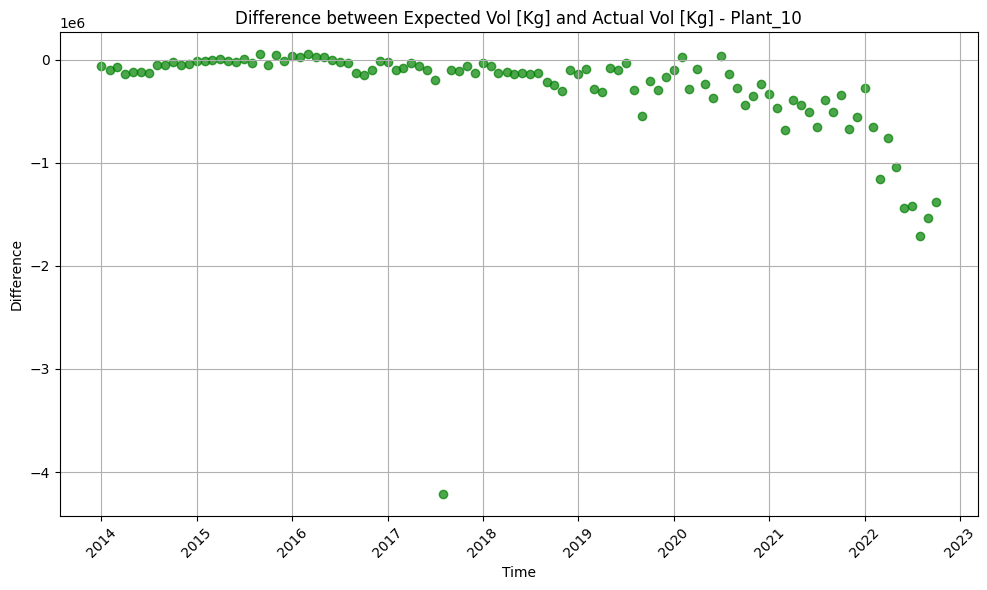

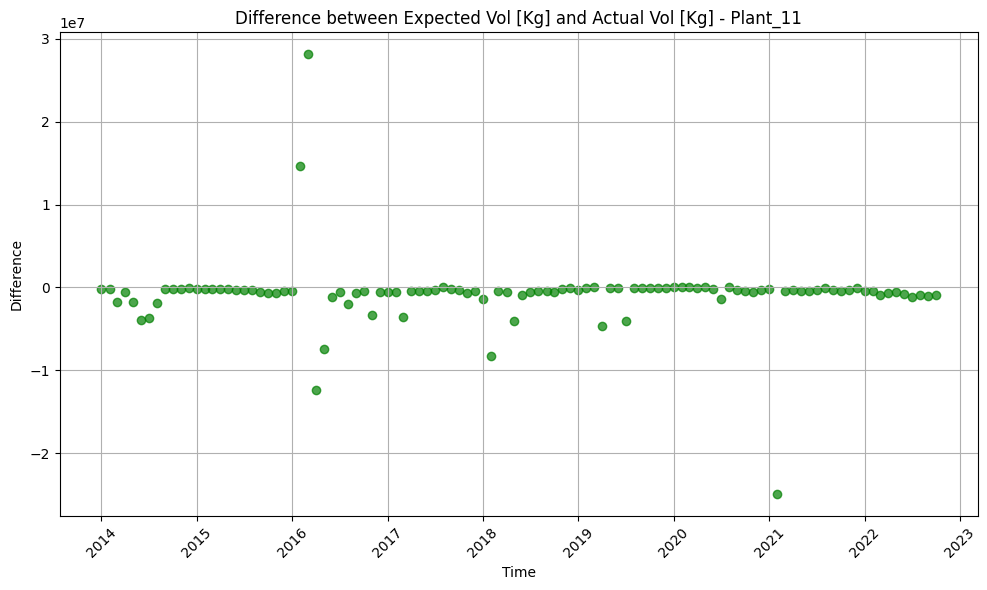

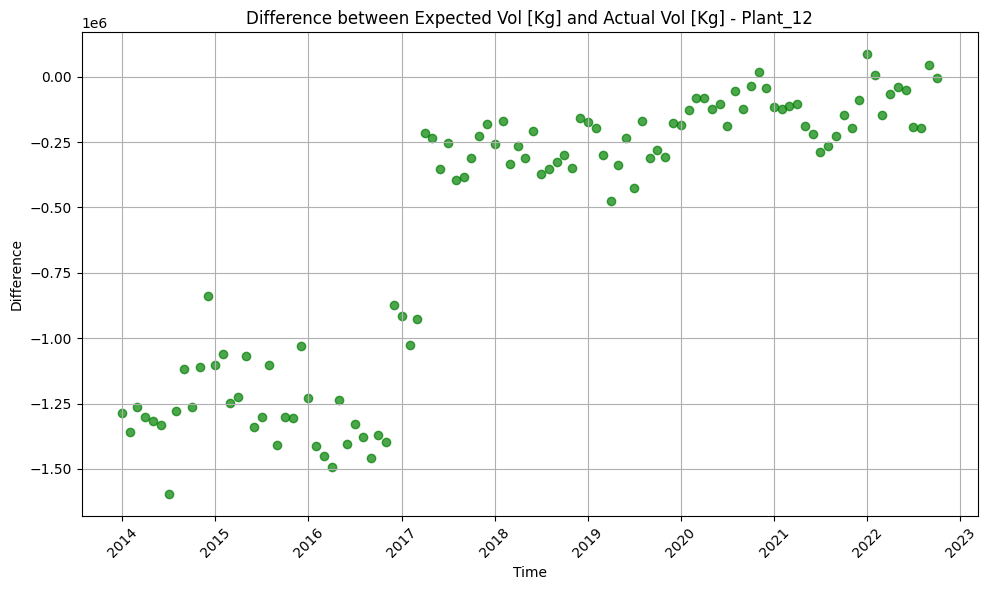

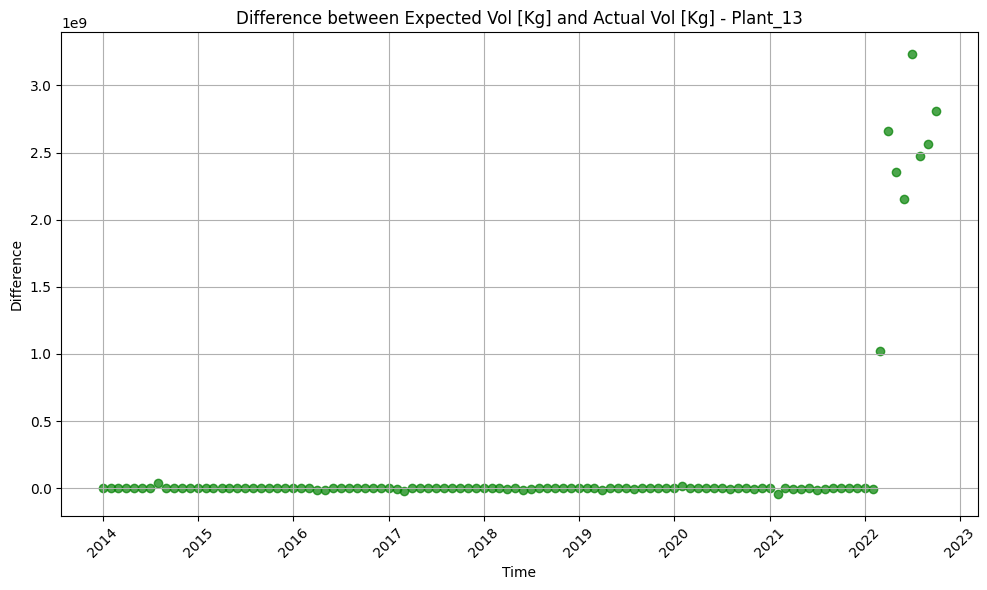

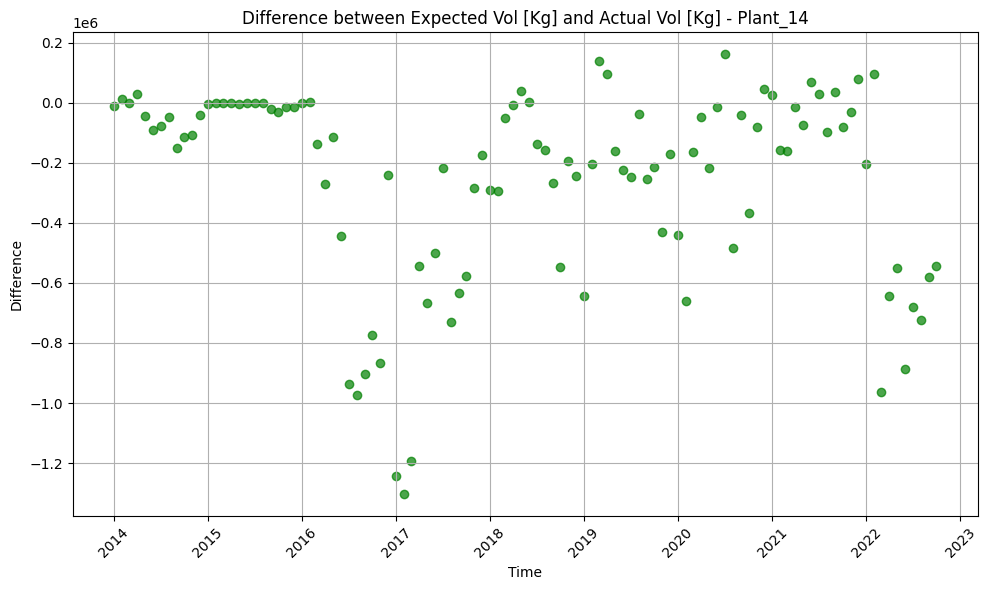

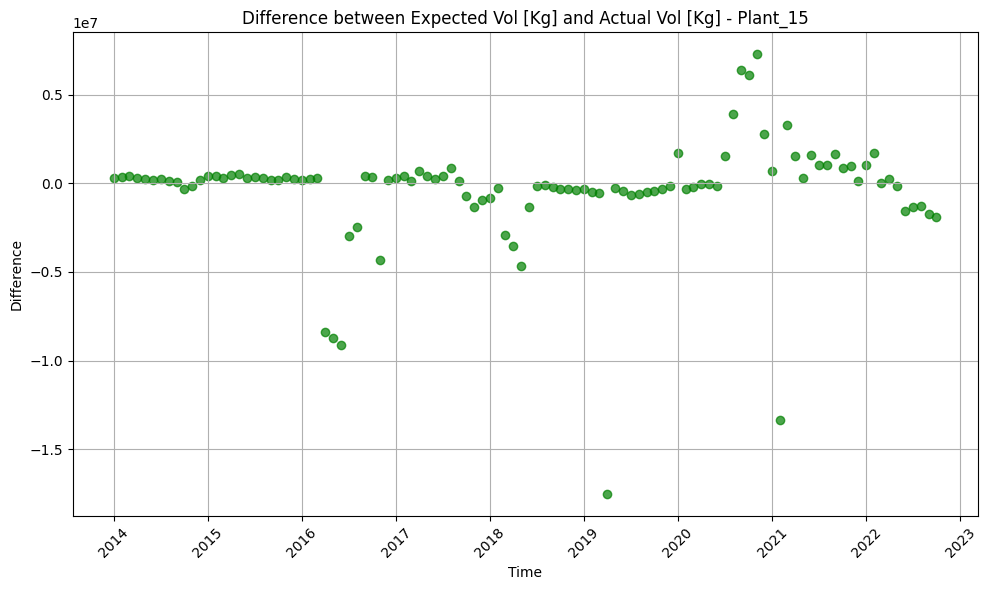

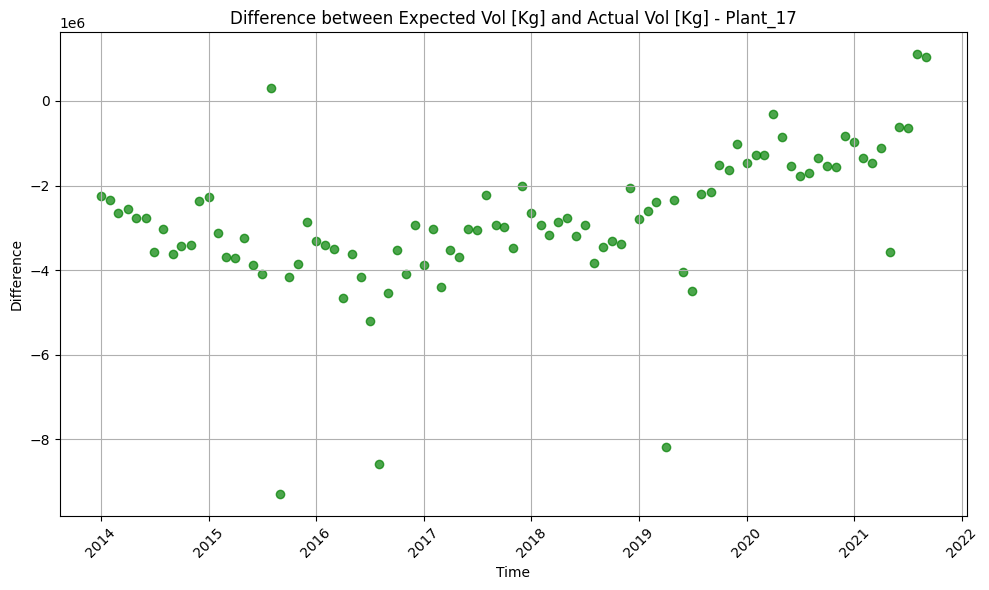

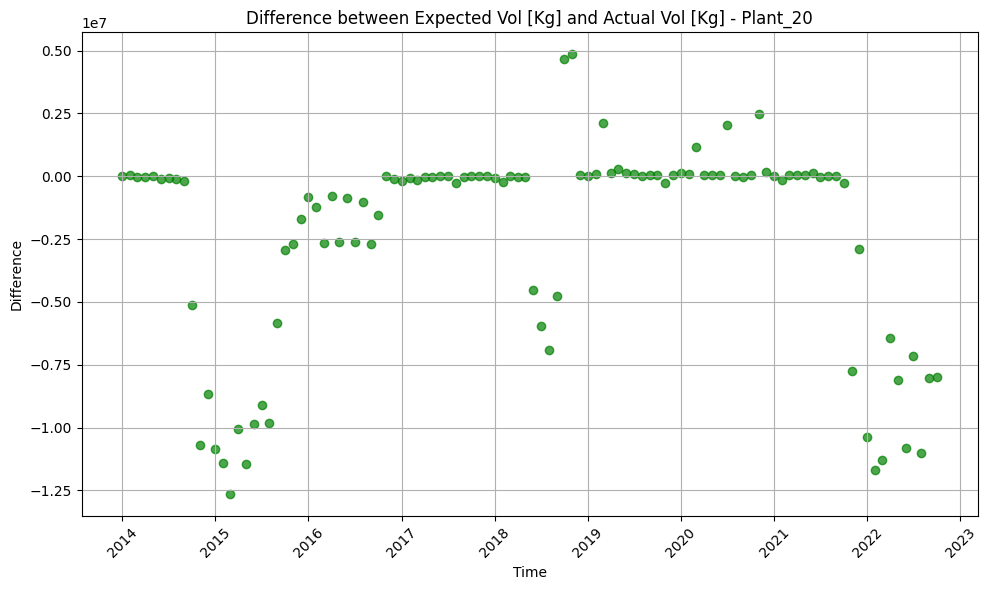

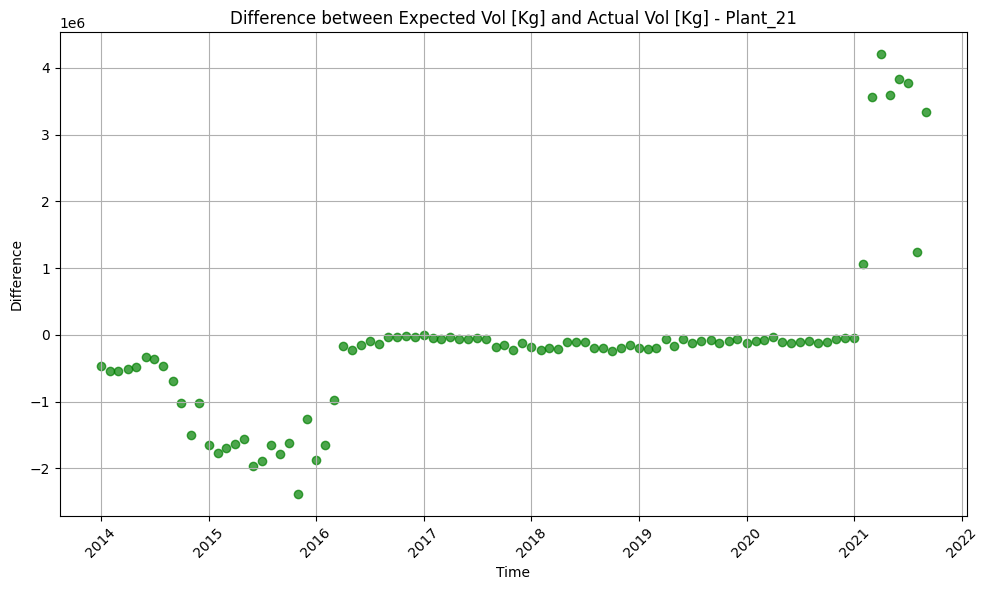

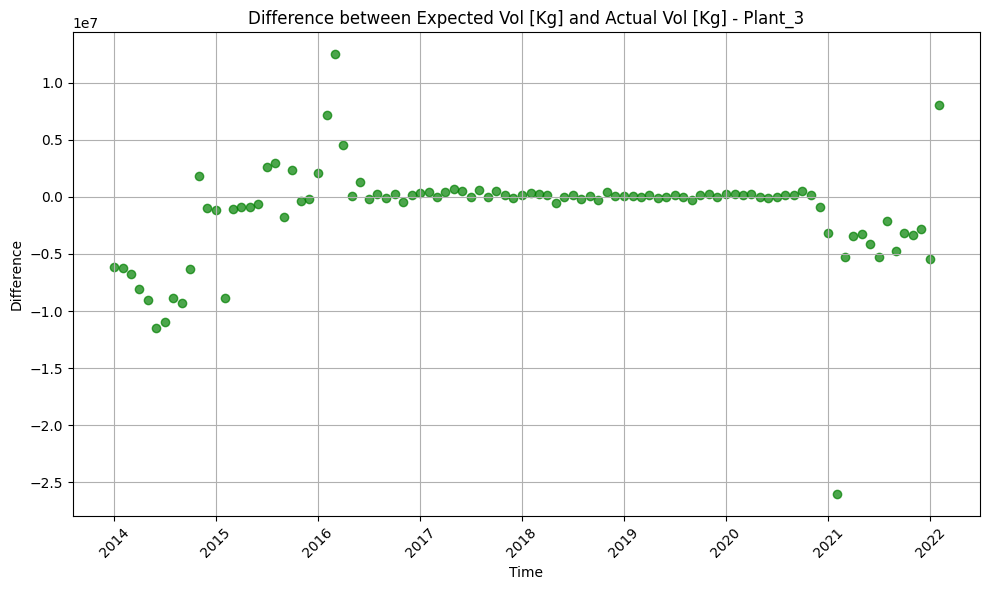

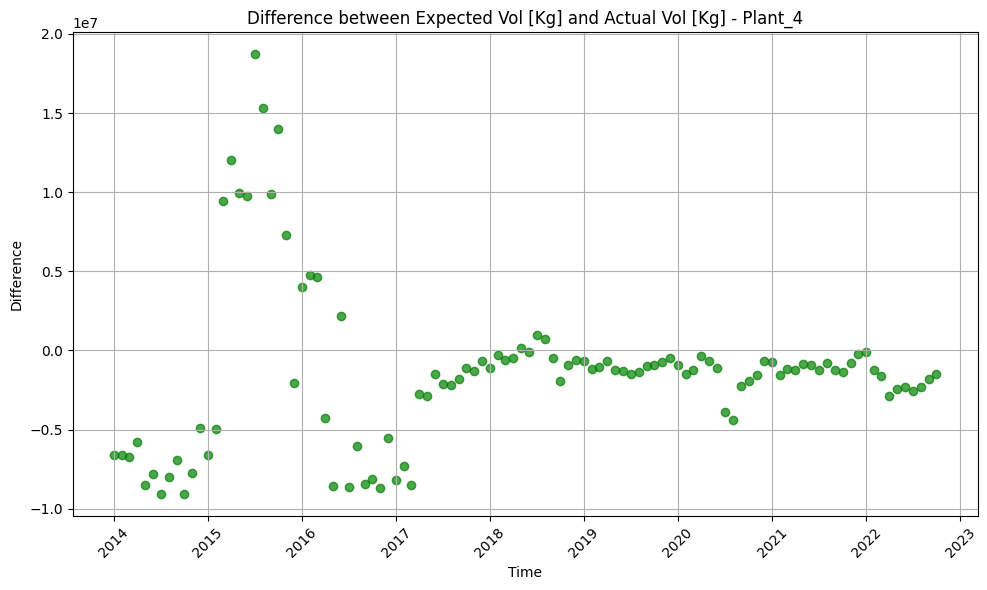

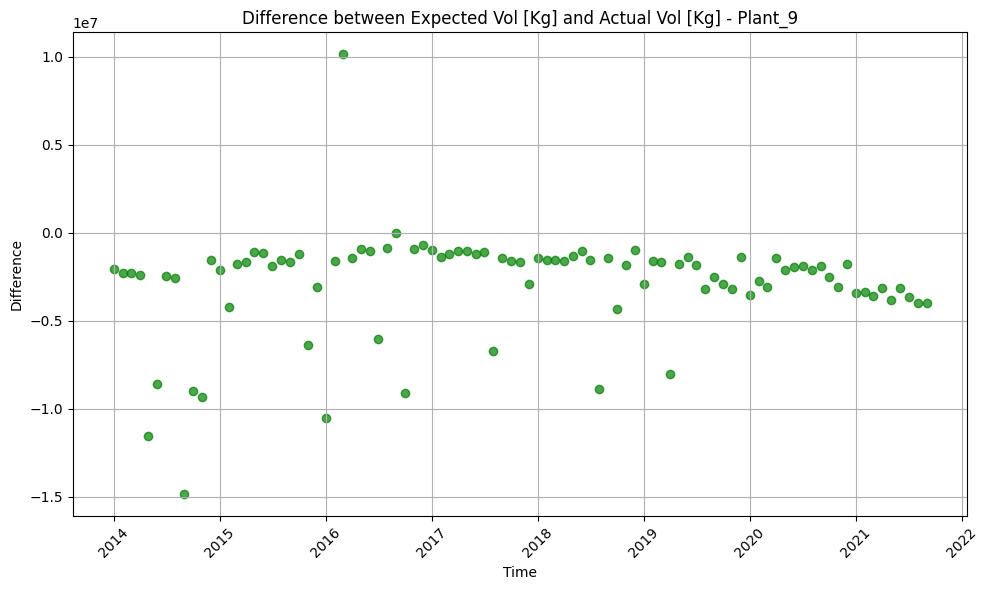

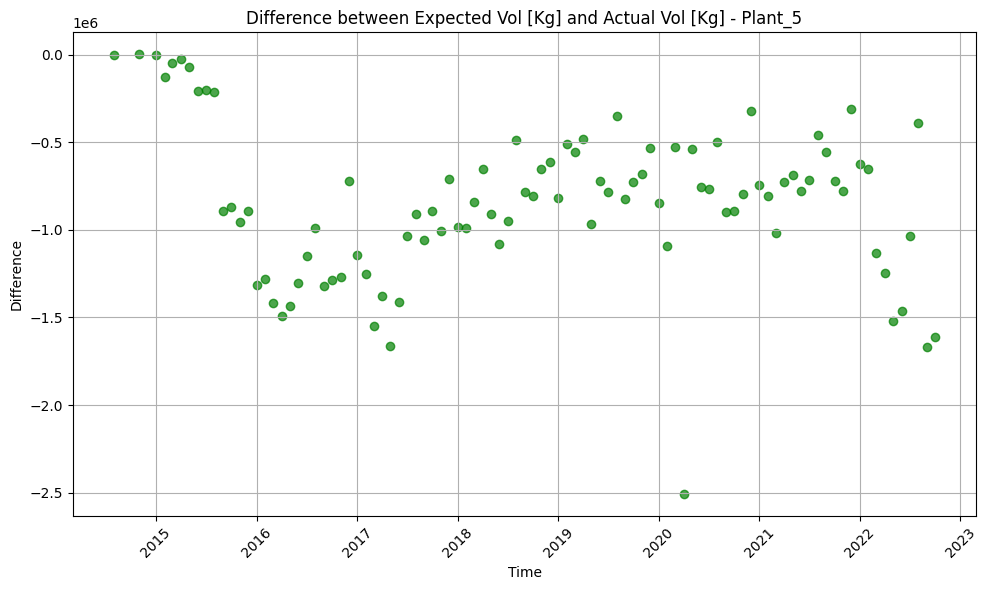

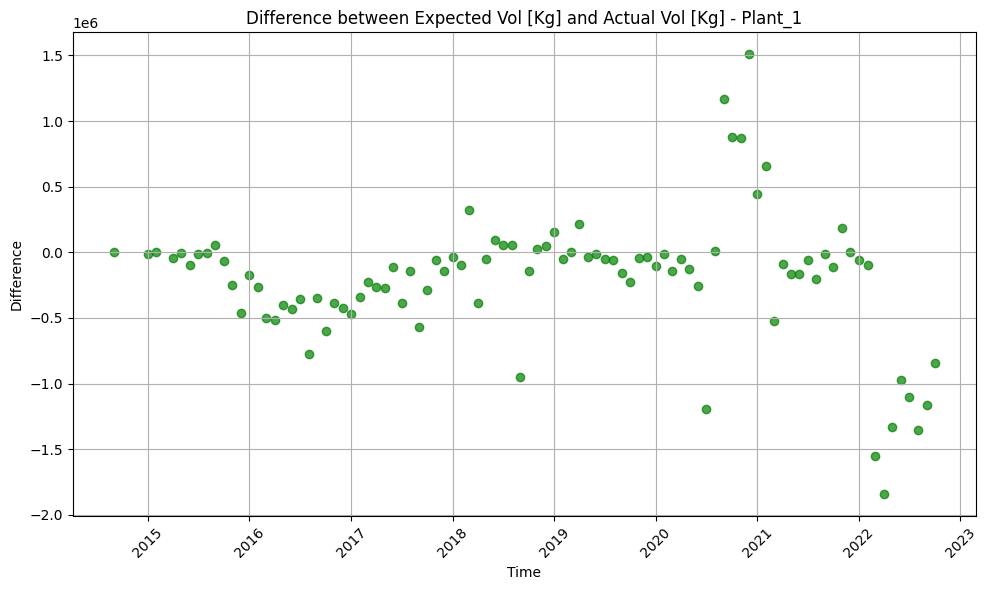

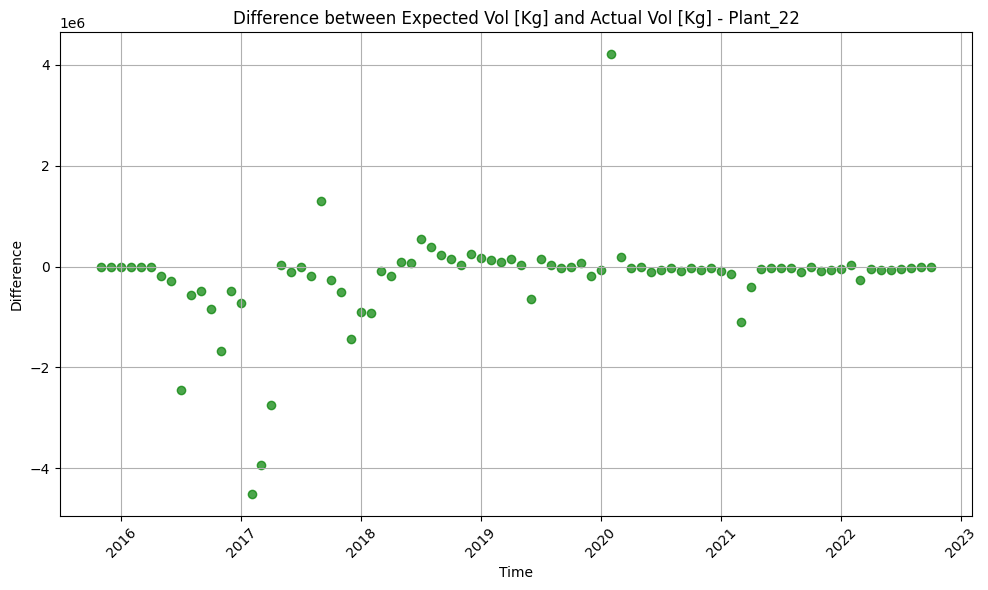

In [57]:
## PLOT: Difference between 'Expected Vol [Kg]' and 'Actual Vol [Kg]' (Per PLANT and in a set SETTIMEFRAME)

# Filter data for a specific timeframe (e.g., from 'start_date' to 'end_date')
start_date = '2014-01-01'
end_date = '2022-10-31'

# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    
    filtered_df = produce_vs_received[(produce_vs_received['Timestamp'] >= start_date) & (produce_vs_received['Timestamp'] <= end_date) &(produce_vs_received['Plant'] == plant)]

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['Timestamp'], filtered_df['Difference'], label='Difference', color='green', alpha=0.7)
    
    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Difference')
    plt.title(f'Difference between Expected Vol [Kg] and Actual Vol [Kg] - {plant}')

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()

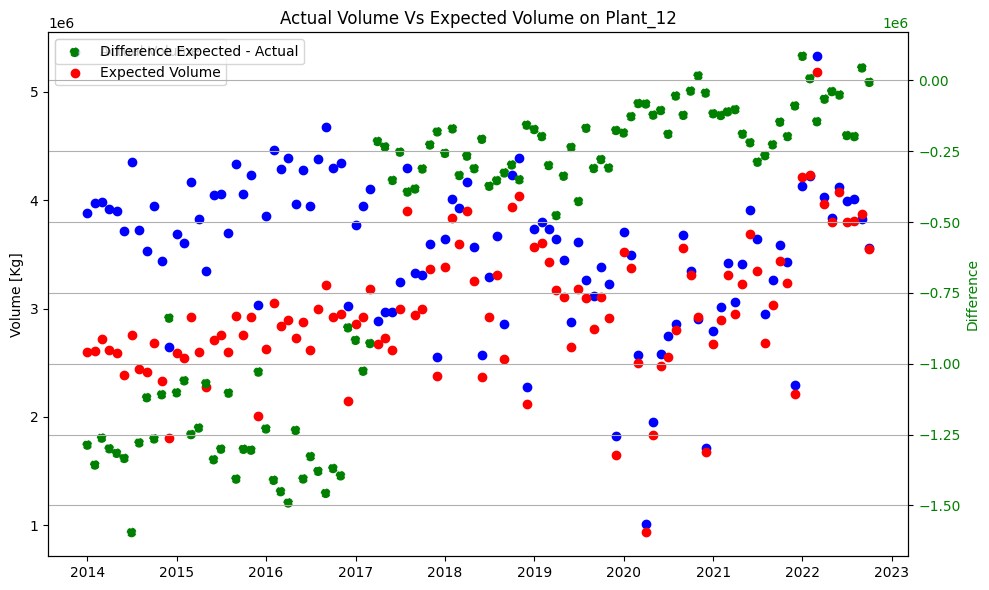

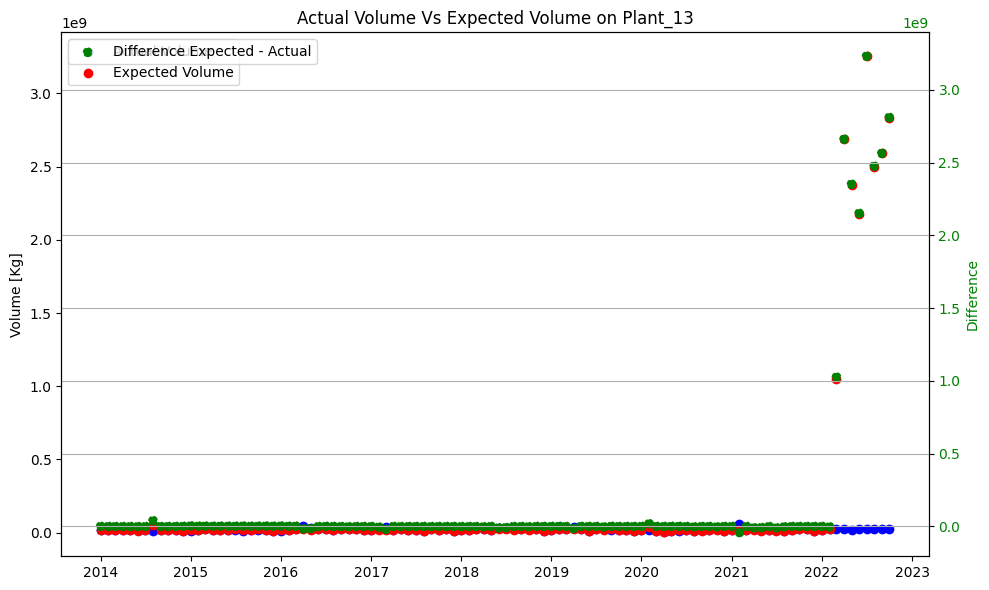

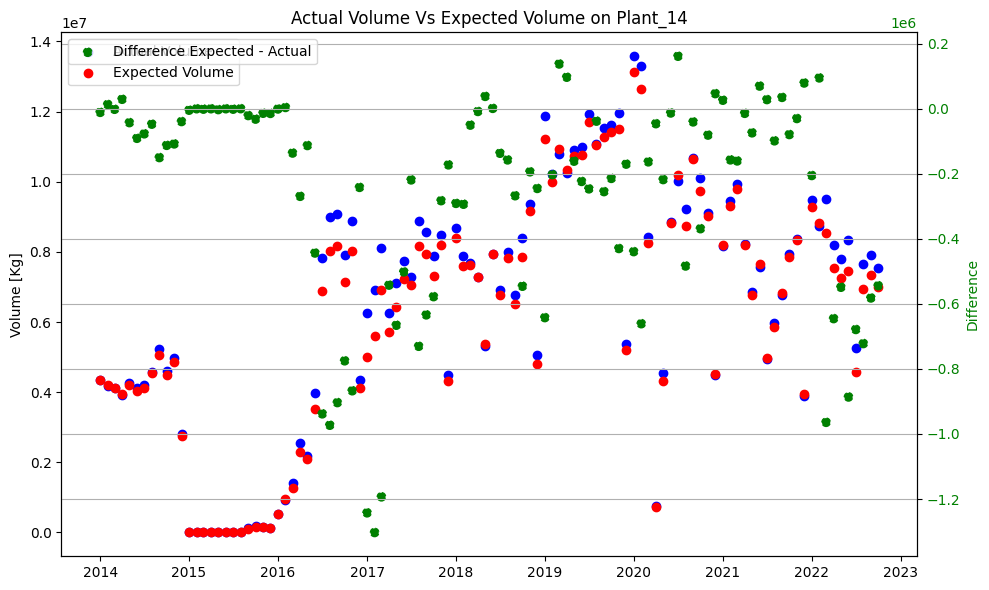

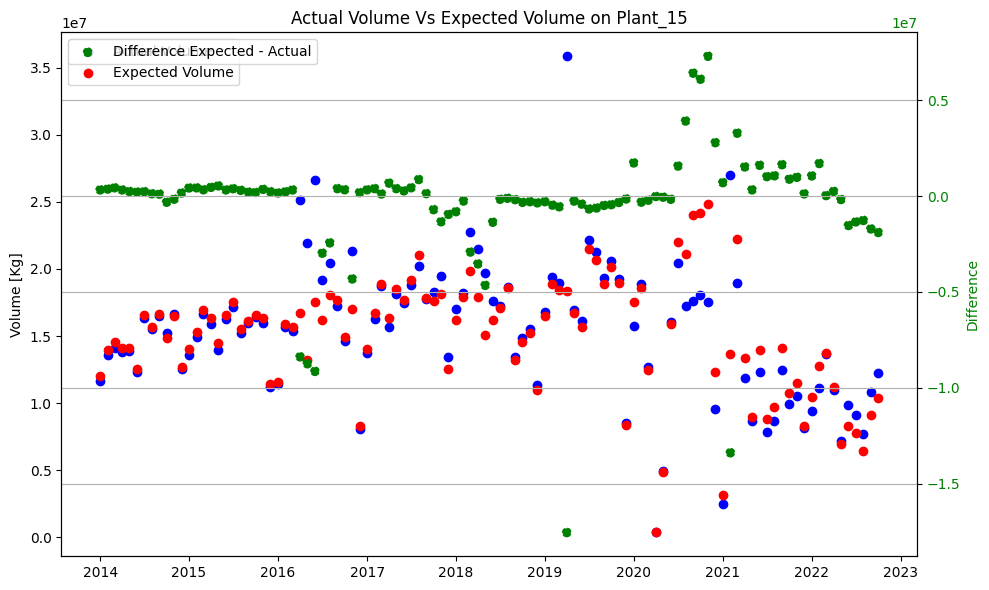

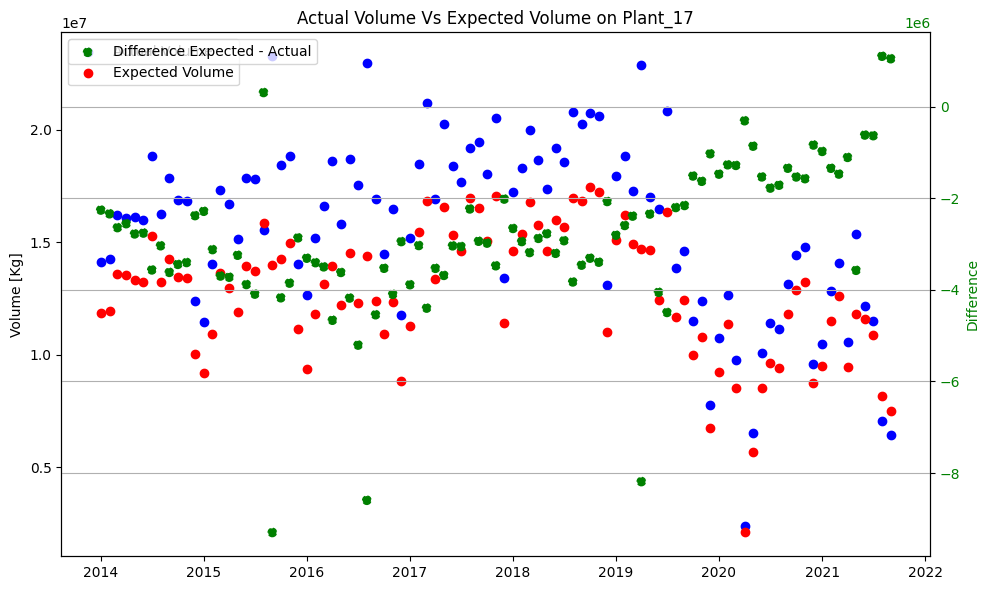

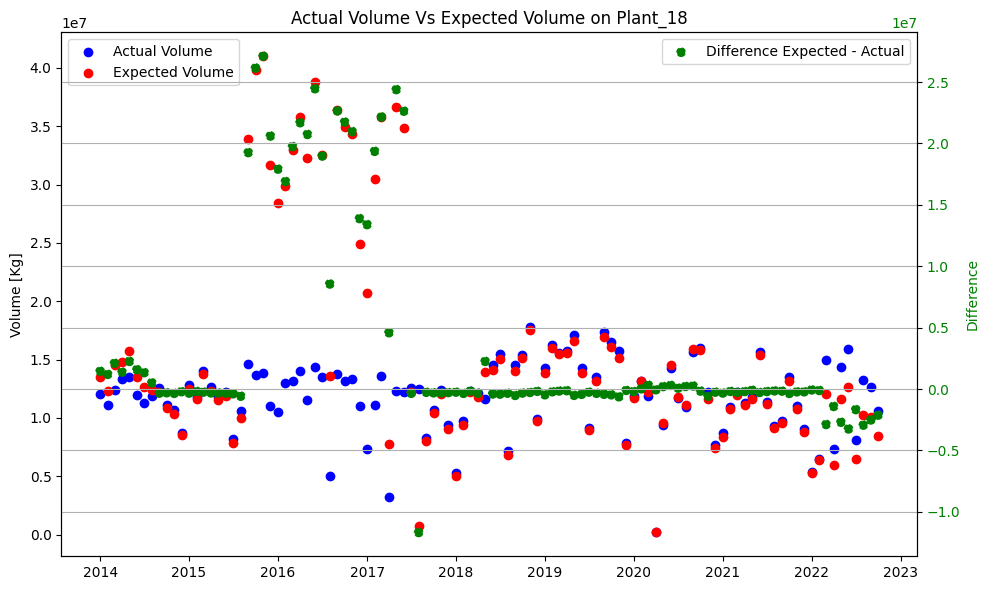

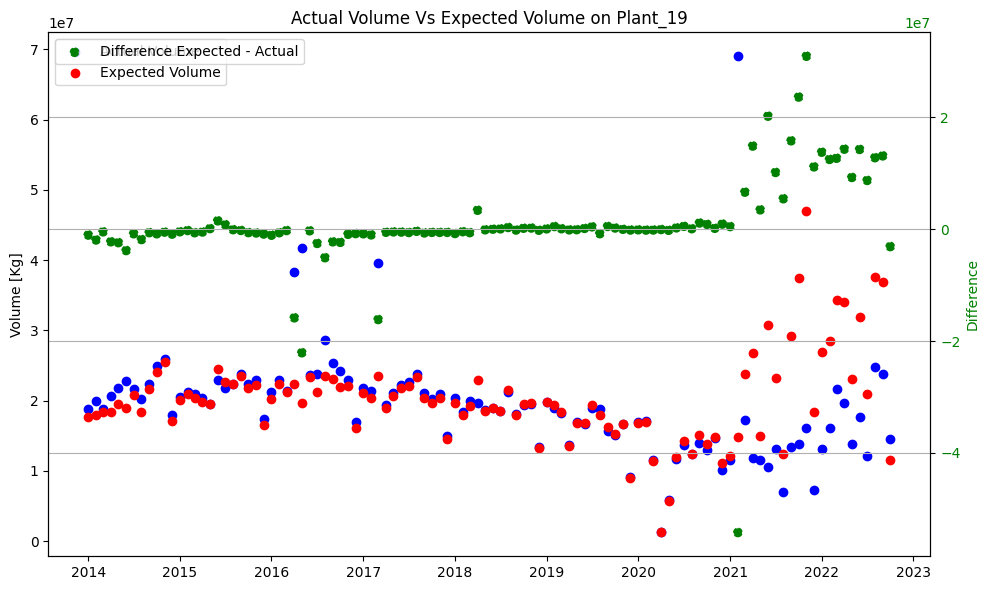

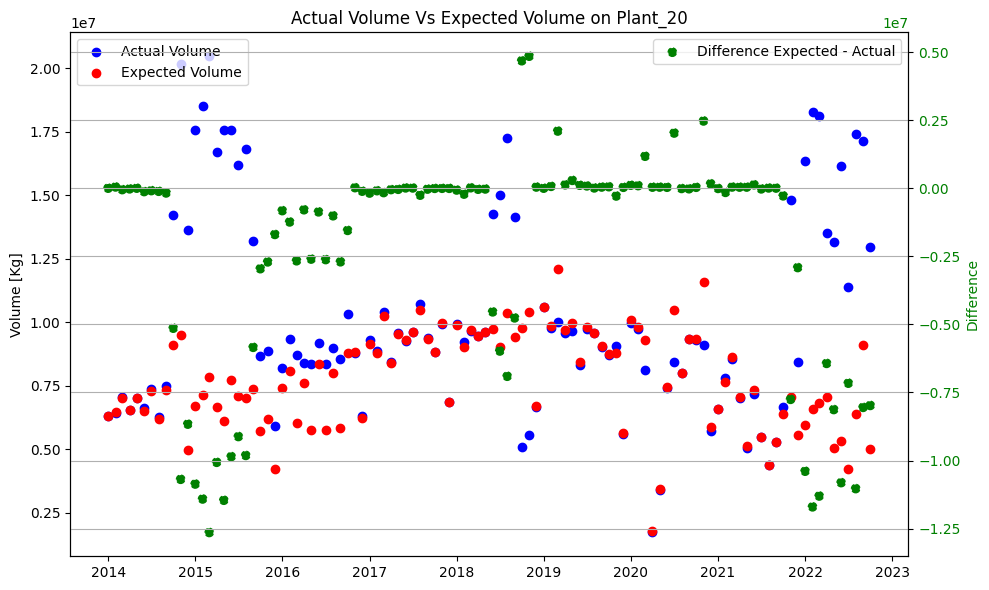

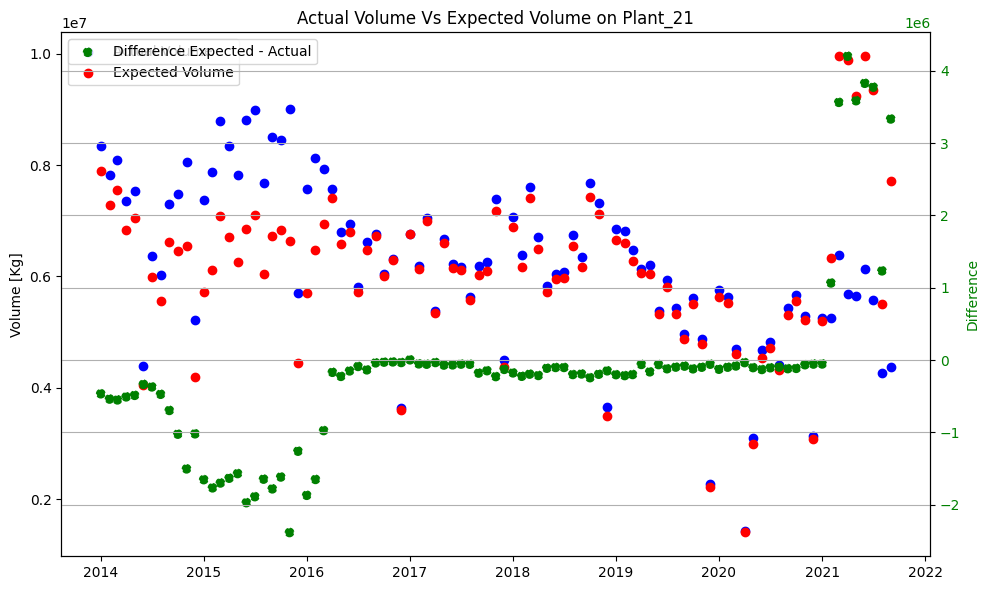

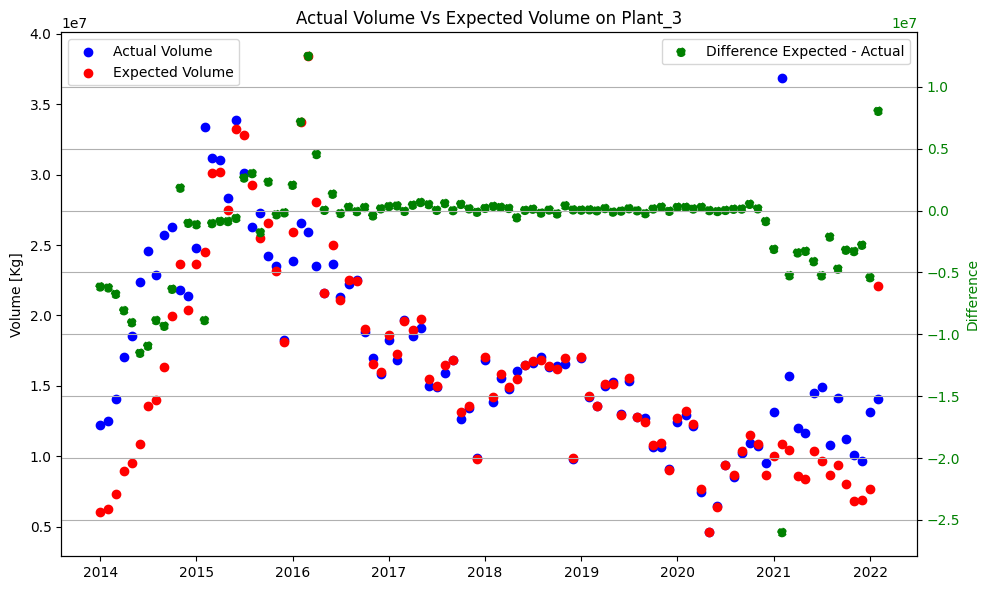

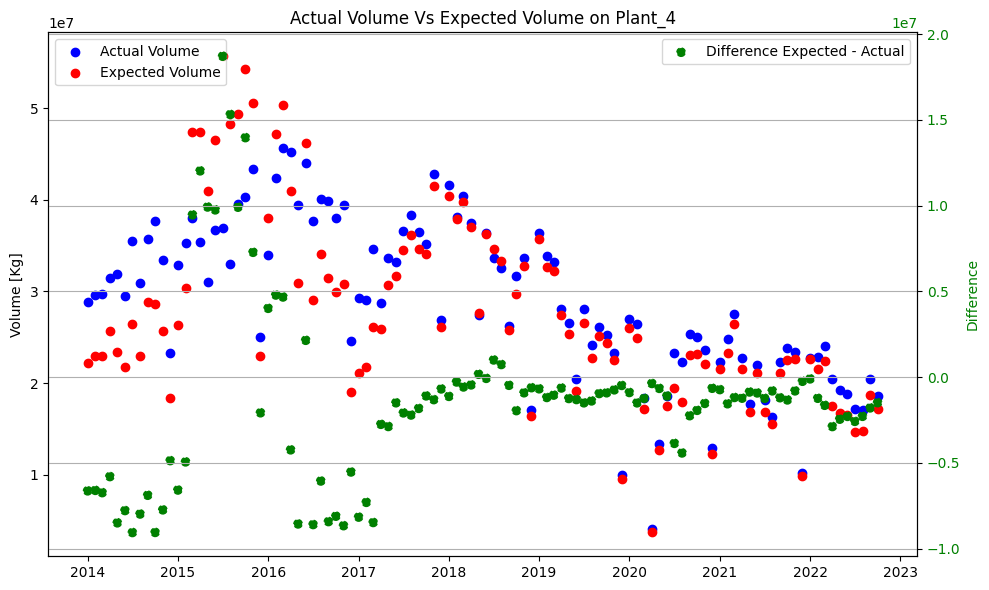

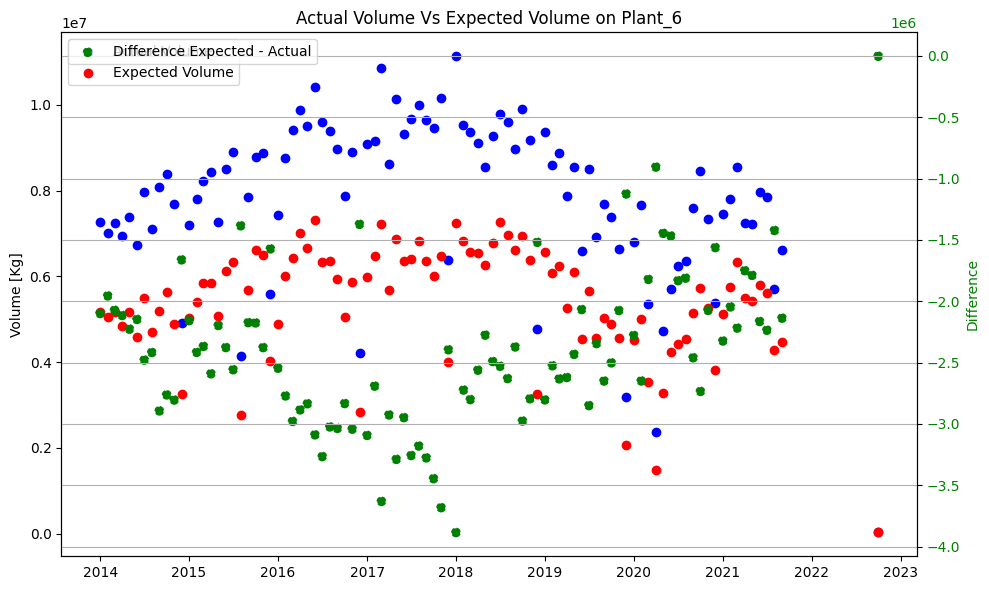

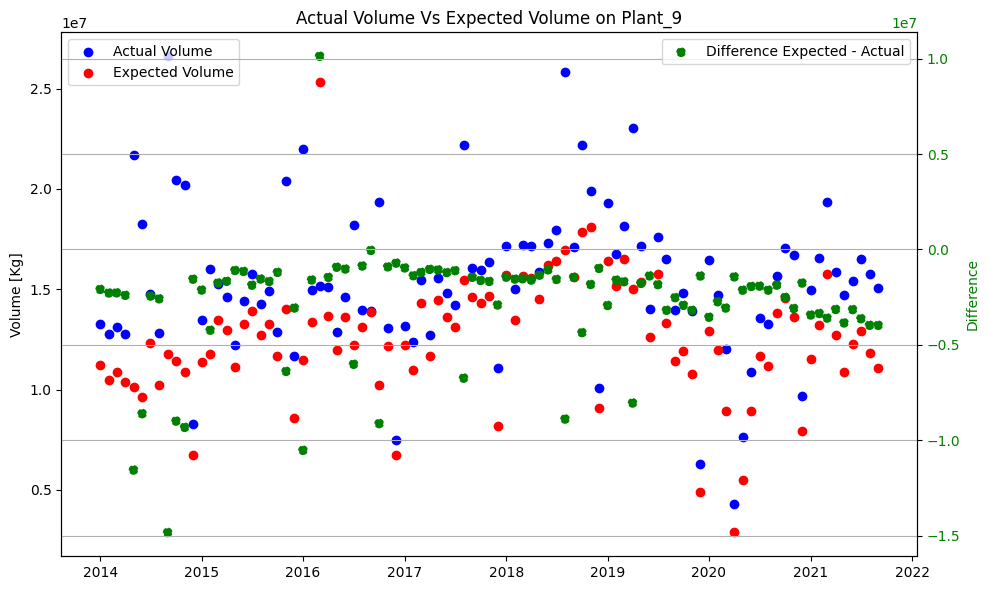

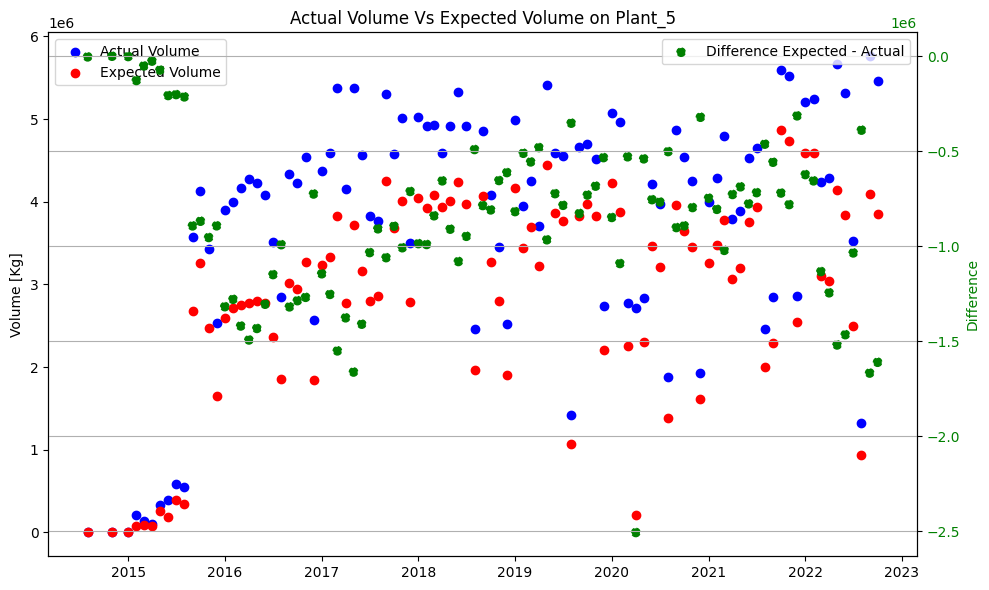

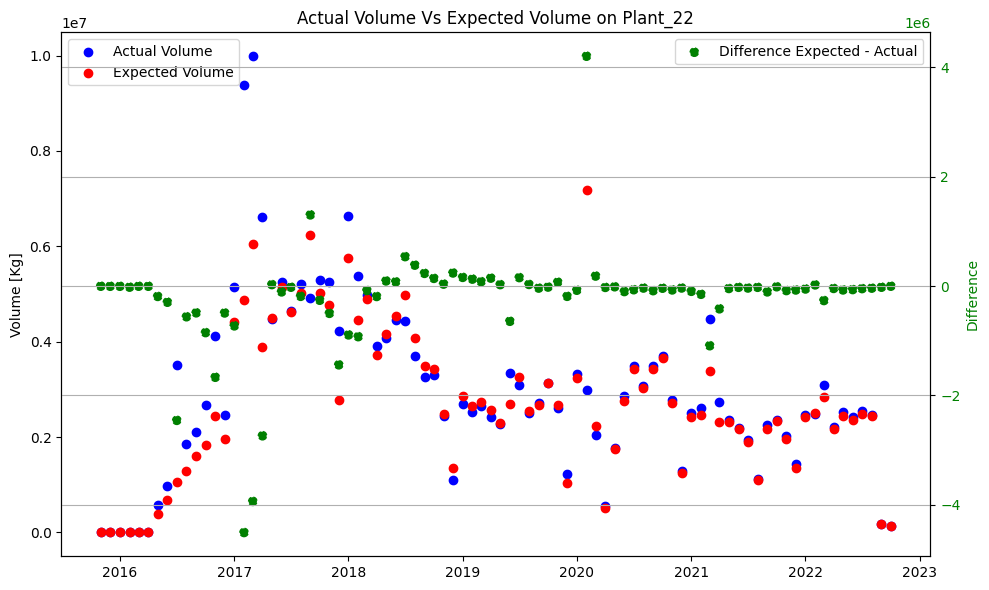

In [58]:
## PLOT: Difference between 'Expected Vol [Kg]' and 'Actual Vol [Kg]' (Per PLANT and in a set SETTIMEFRAME)

# Filter data for a specific timeframe (e.g., from 'start_date' to 'end_date')
start_date = '2014-01-01'
end_date = '2022-10-31'

# Get unique plant names from the DataFrame
unique_plants = produce_vs_received['Plant'].unique()

# Loop through each unique plant and create a separate plot for each
for plant in unique_plants:
    #filter by timeframe and plant
    filtered_df = produce_vs_received[(produce_vs_received['Timestamp'] >= start_date) & (produce_vs_received['Timestamp'] <= end_date) &(produce_vs_received['Plant'] == plant)]

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))

     # Create the first plot for 'Actual Vol [Kg]' vs 'Timestamp' per plant on the left y-axis
    ax1 = plt.gca()
    ax1.scatter(filtered_df['Timestamp'], filtered_df['Actual Vol [Kg]'], label=f"Actual Volume", color='blue')
    ax1.scatter(filtered_df['Timestamp'], filtered_df['Expected Vol [Kg]'], label=f"Expected Volume", color='red')
    ax1.set_ylabel('Volume [Kg]')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # Create the second plot for 'Difference' vs 'Timestamp' per plant on the right y-axis
    ax2 = ax1.twinx()
    ax2.scatter(filtered_df['Timestamp'], filtered_df['Difference'], label=f"Difference Expected - Actual", color='green', linestyle='dashed')
    ax2.set_ylabel('Difference', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    # Set common x-axis label and title
    plt.xlabel('Time')
    plt.title(f'Actual Volume Vs Expected Volume on {plant}')

    # Rotate x-axis labels for better readability (if needed)
    #plt.xticks(rotation=45)

    # Show grid
    plt.grid(True)

    plt.legend()

    plt.tight_layout()
    plt.show()

### Checking for Missing data

In [59]:
# Check time range
min_timestamp = produce_vs_received['Timestamp'].min()
max_timestamp = produce_vs_received['Timestamp'].max()
print(f"Time range: {min_timestamp} to {max_timestamp}")

# Create a date range covering the expected timeframe
expected_time_range = pd.date_range(start=min_timestamp, end=max_timestamp, freq='MS')  # Change frequency as needed

# Identify missing timestamps
missing_timestamps = expected_time_range[~expected_time_range.isin(produce_vs_received['Timestamp'])]
if not missing_timestamps.empty:
    print(f"Missing timestamps: {missing_timestamps}")
else:
    print("No missing timestamps.")

# Check for missing data points (NaN or null values)
missing_data = produce_vs_received.isnull().sum()
if missing_data.any():
    print("Missing data points:")
    print(missing_data)
else:
    print("No missing data points.")

Time range: 2014-01-01 00:00:00 to 2022-10-01 00:00:00
No missing timestamps.
Missing data points:
Timestamp             0
Plant                 0
Actual Vol [Kg]       0
Expected Vol [Kg]     0
Production            0
Difference            0
Ratio                18
dtype: int64
